In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
version = 7
path = Path(
    f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/ontogeny_males_clean_pseudotime_v02.parquet"
)

df = pd.read_parquet(path)
df.set_index(
    ["pseudotime_rank", "pseudotime_dist", "pseudo_age"], append=True, inplace=True
)
df.columns = df.columns.map(int)

test_path = path.parent / "longtogeny_males_clean_v2.parquet"
test_df = pd.read_parquet(test_path).reindex(columns=df.columns).fillna(0)

## Global syllable usage between both groups

In [3]:
ont = df.melt(var_name='syllable', value_name='usage')
long = test_df.melt(var_name='syllable', value_name='usage')

<Axes: xlabel='syllable', ylabel='usage'>

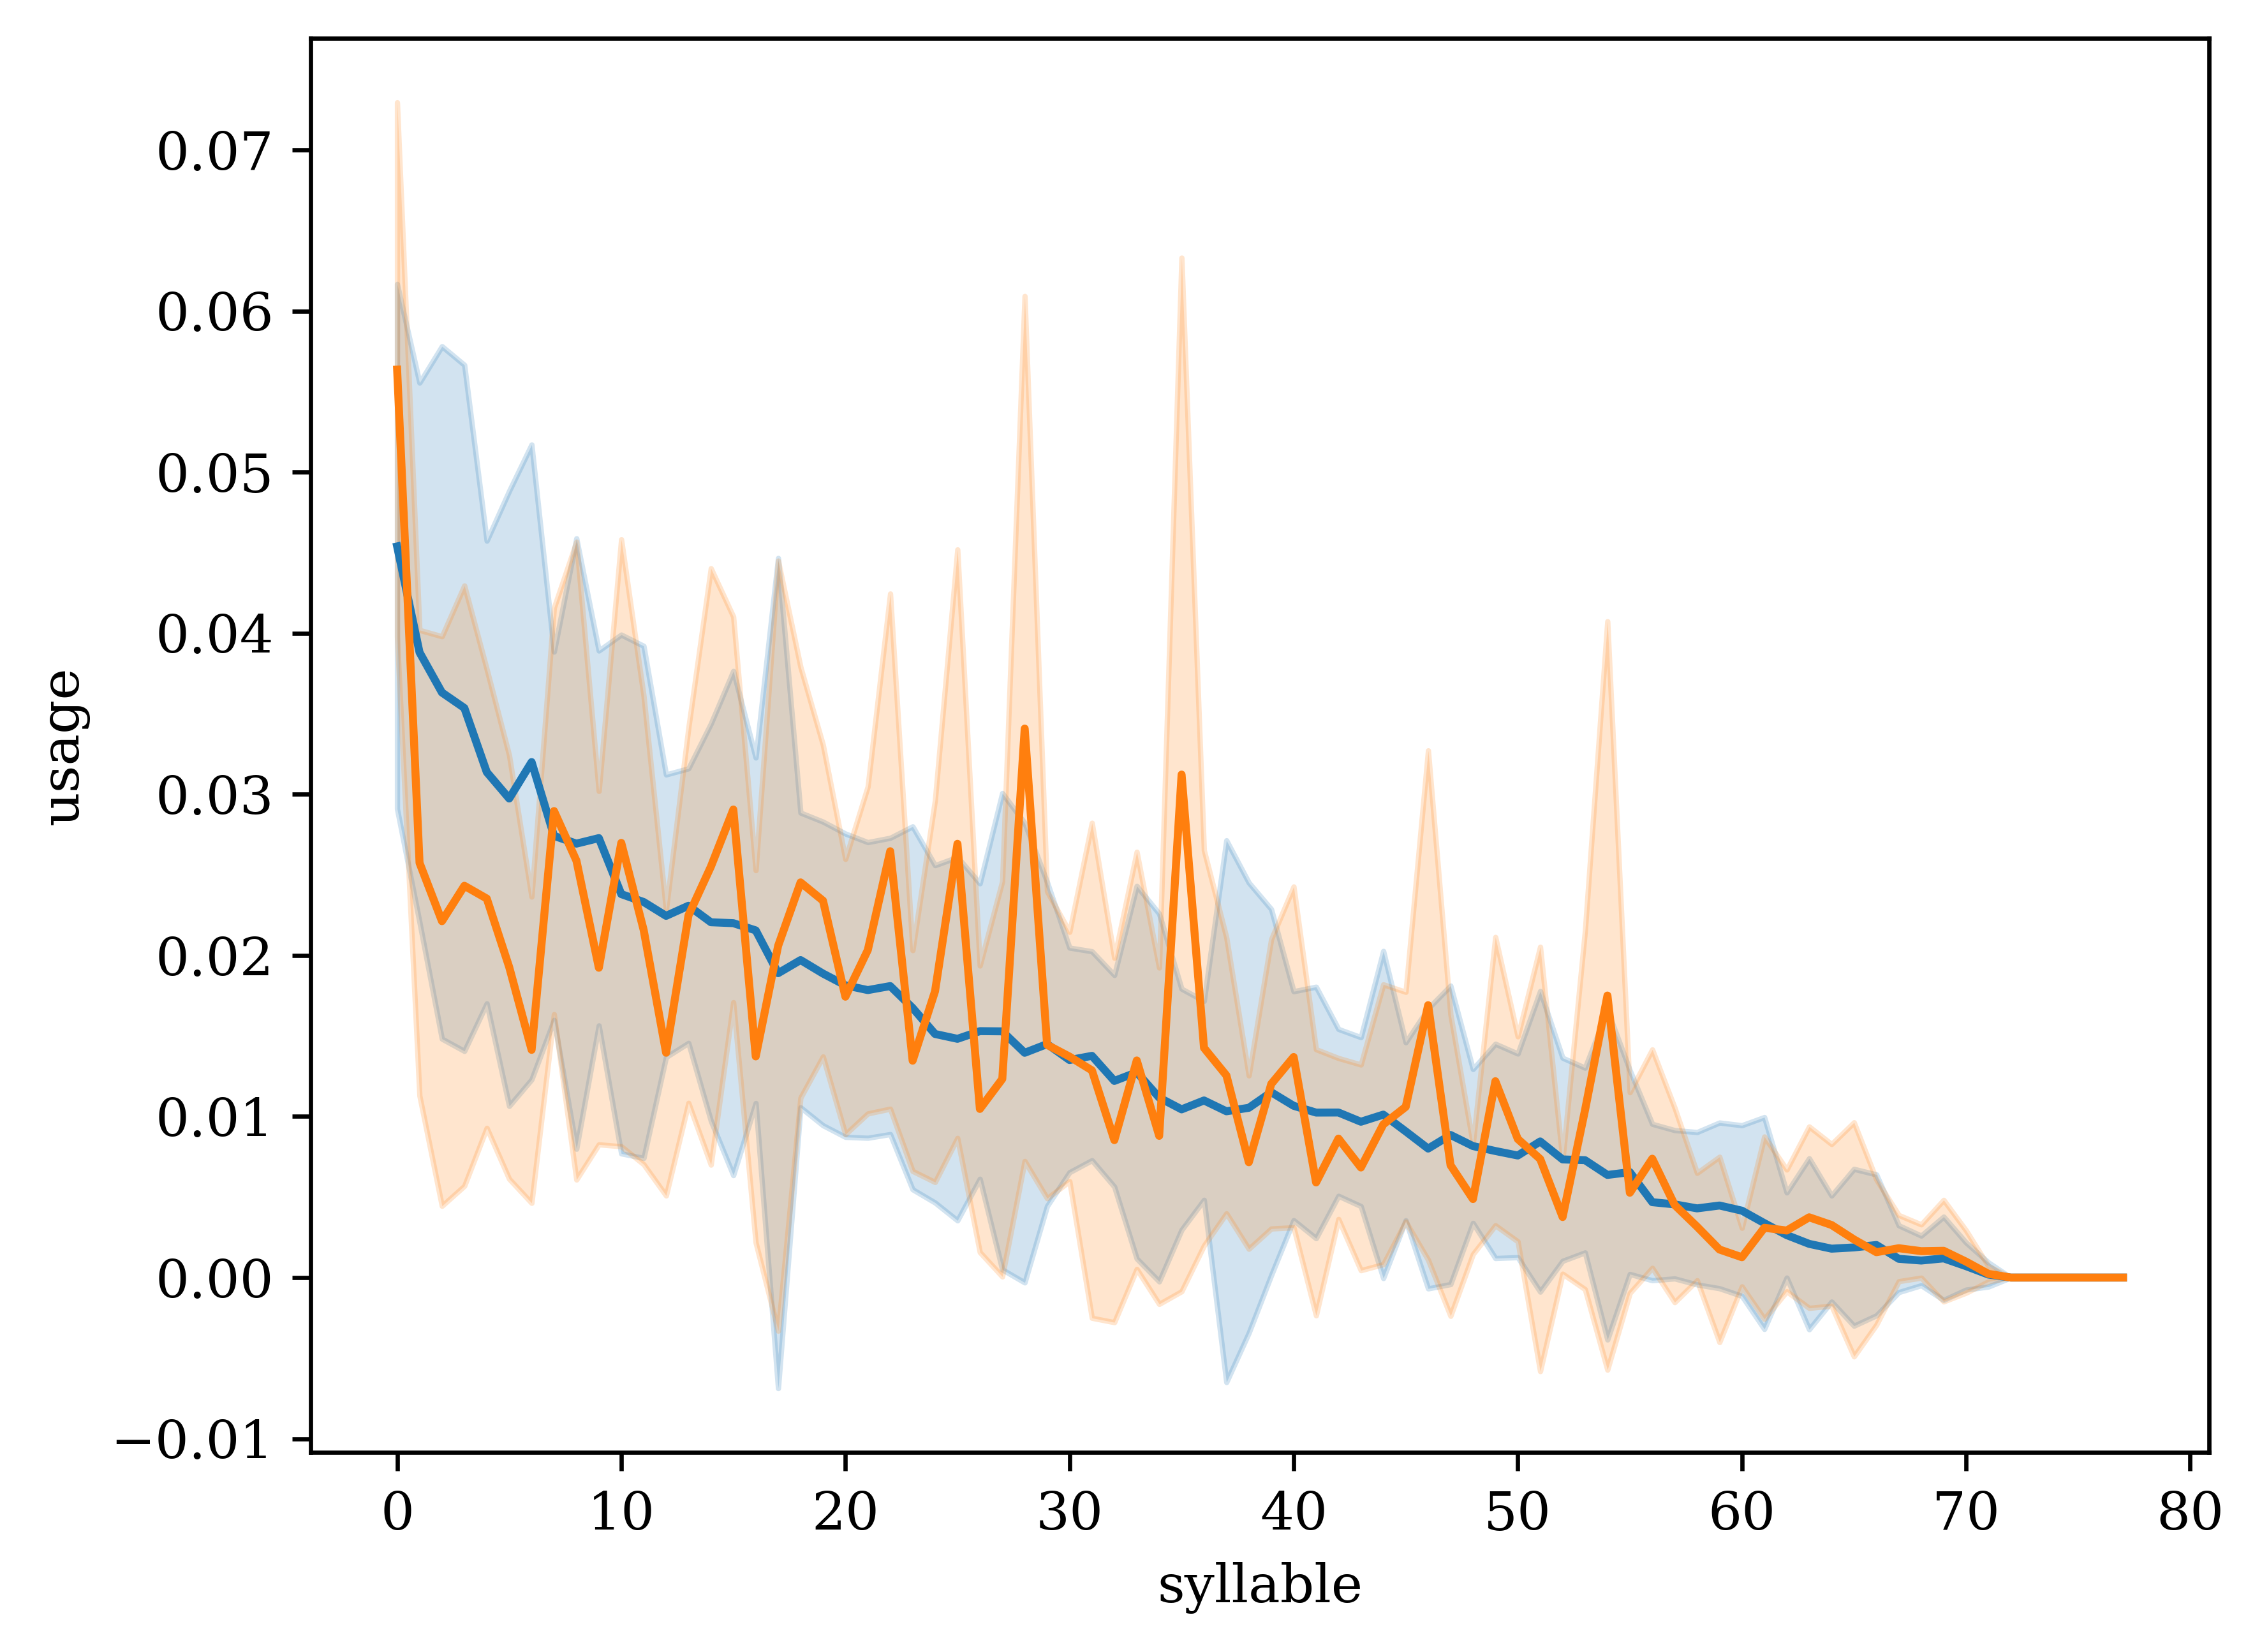

In [4]:
sns.lineplot(data=ont, x='syllable', y='usage', errorbar='sd')
sns.lineplot(data=long, x='syllable', y='usage', errorbar='sd')

<Axes: xlabel='syllable', ylabel='usage'>

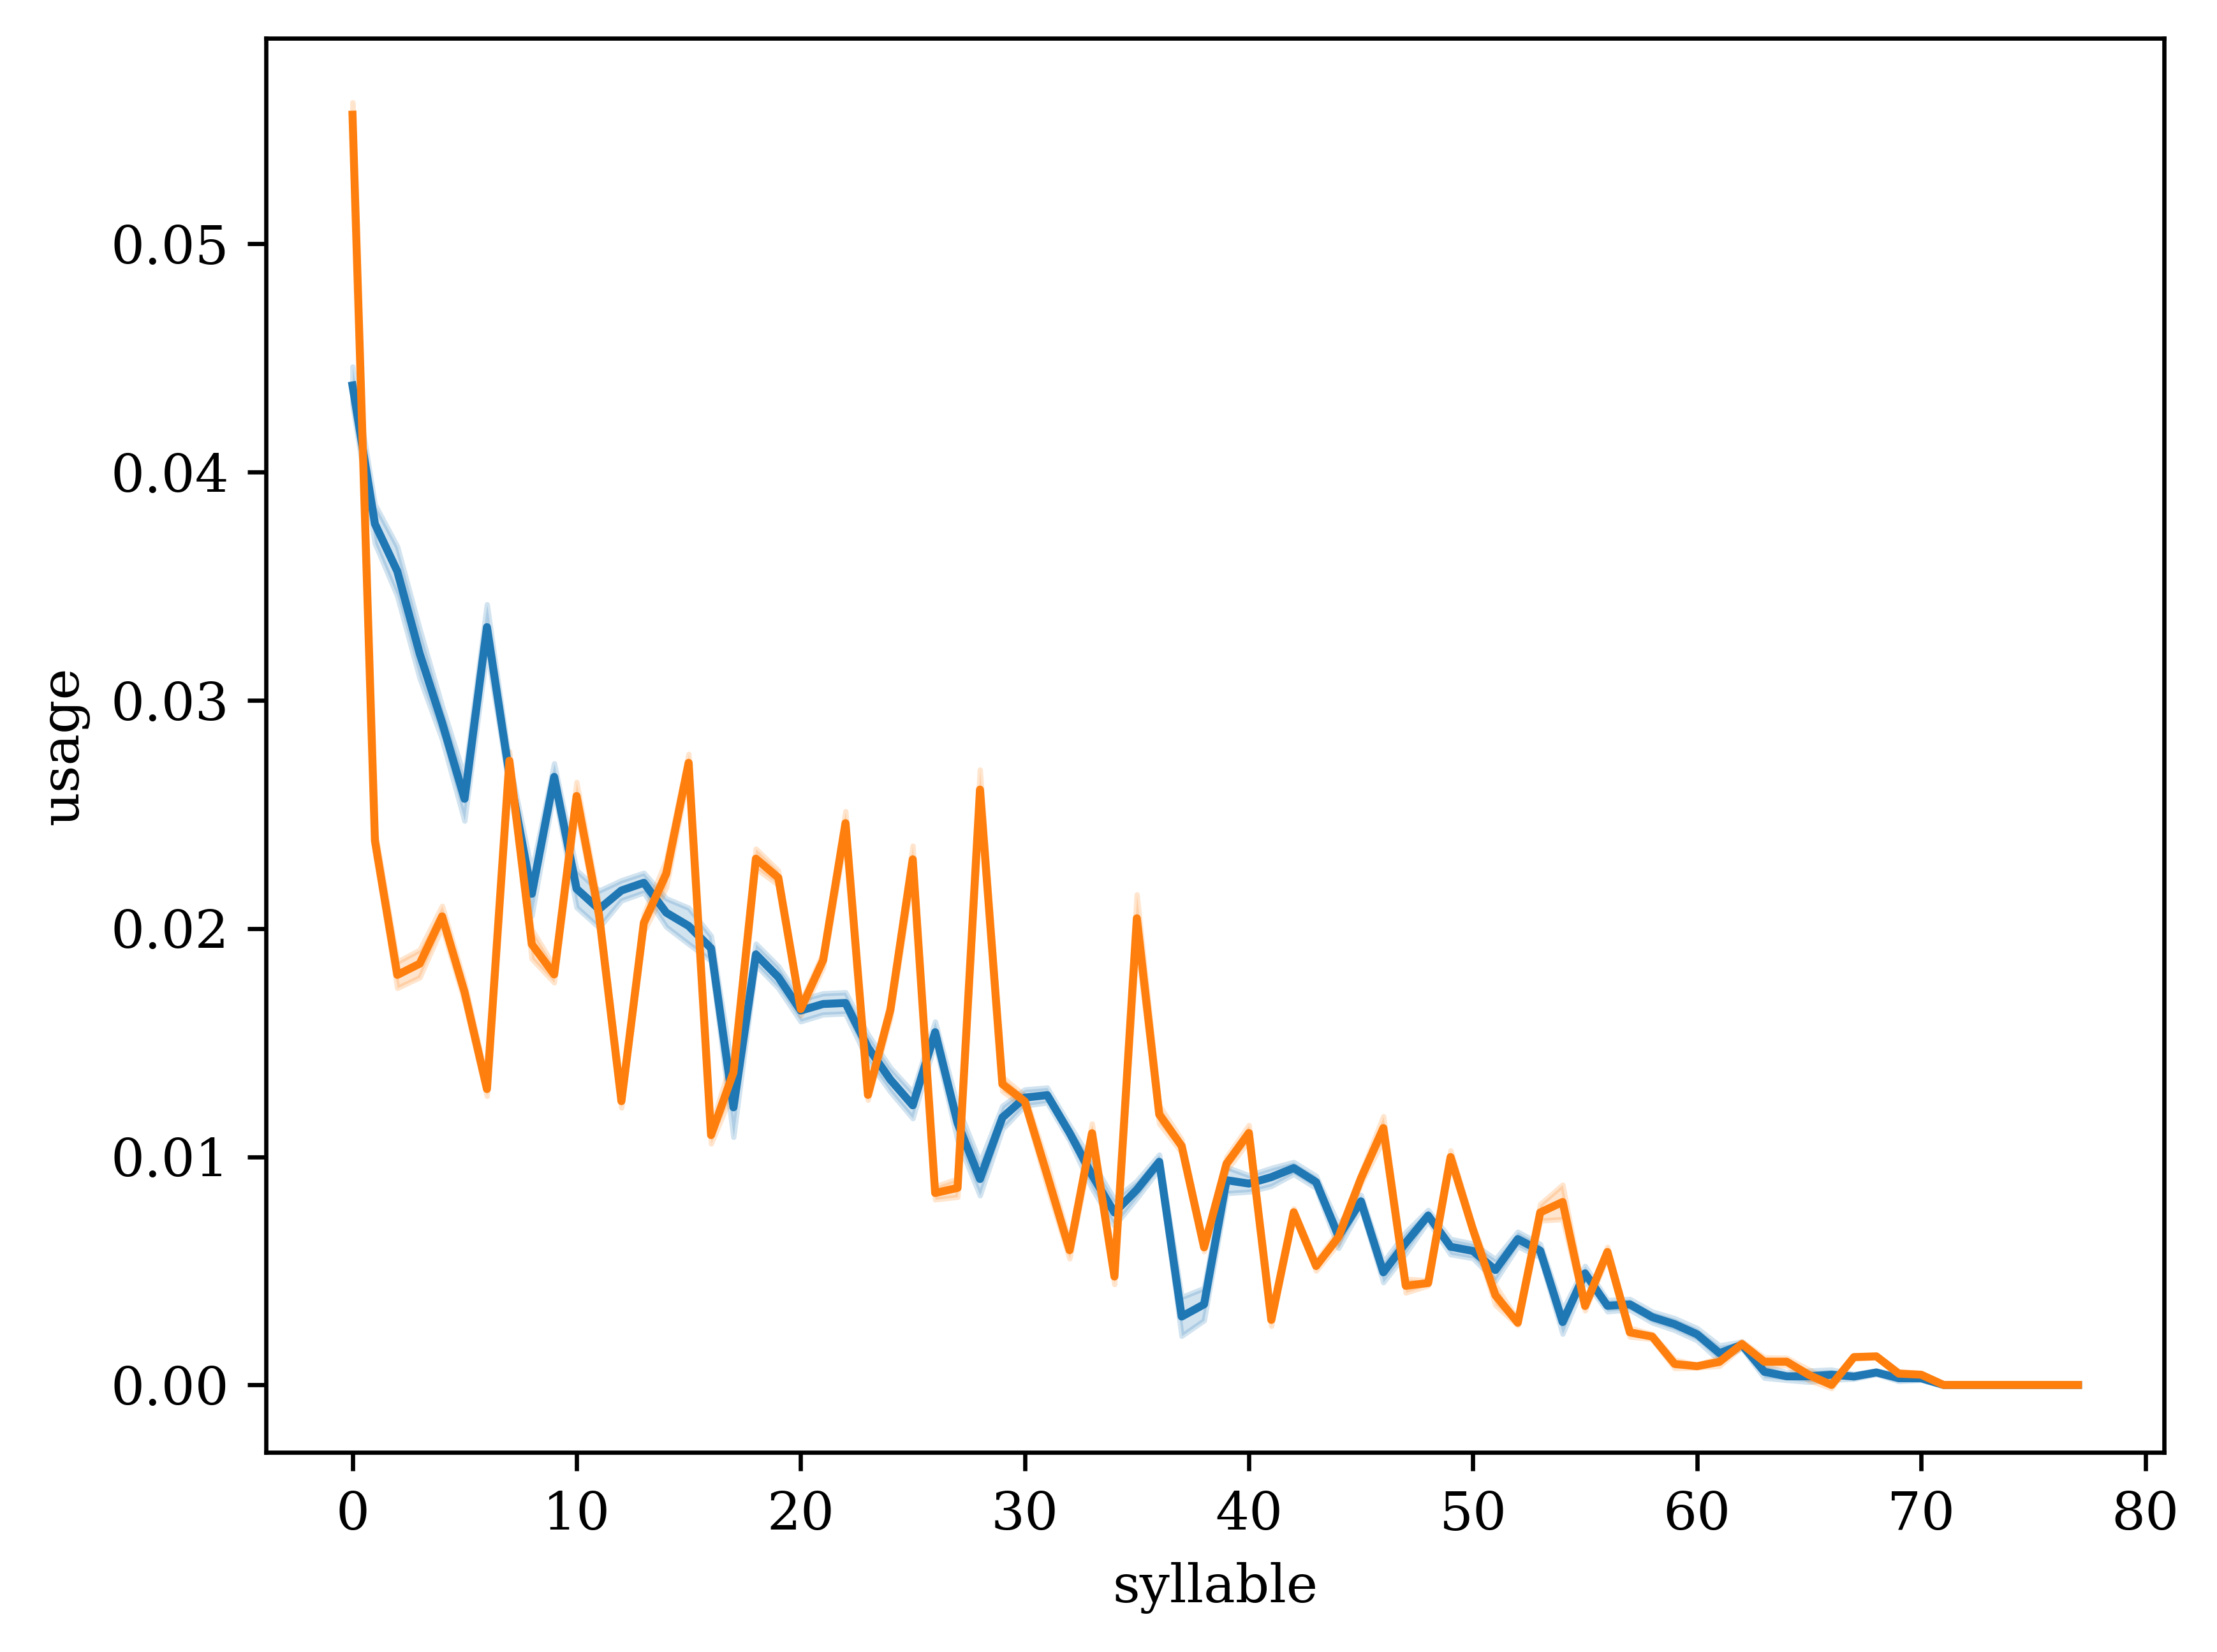

In [20]:
sns.lineplot(data=ont, x='syllable', y='usage', errorbar='se', estimator='median')
sns.lineplot(data=long, x='syllable', y='usage', errorbar='se', estimator='median')

In [6]:
age_dynamics = df.groupby('age').mean()
age_dynamics = age_dynamics.loc[:70]

In [7]:
test_df.index = pd.MultiIndex.from_tuples([(x[0] // 7, *x[1:]) for x in test_df.index], names=test_df.index.names)

In [8]:
long_age_dynamics = test_df.groupby('age').mean()
long_age_dynamics = long_age_dynamics.loc[:70]

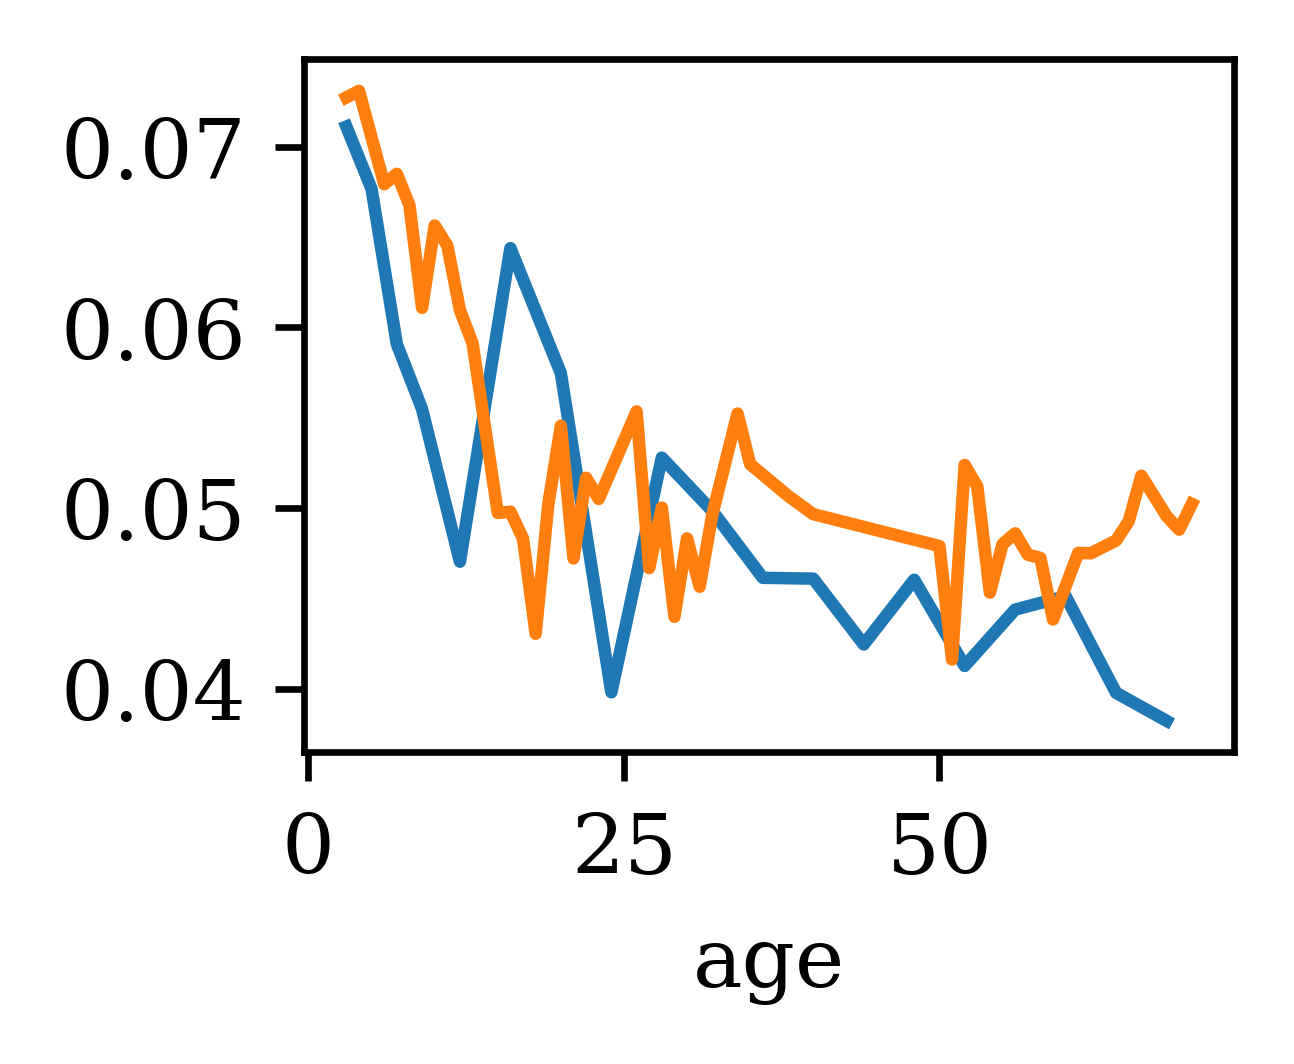

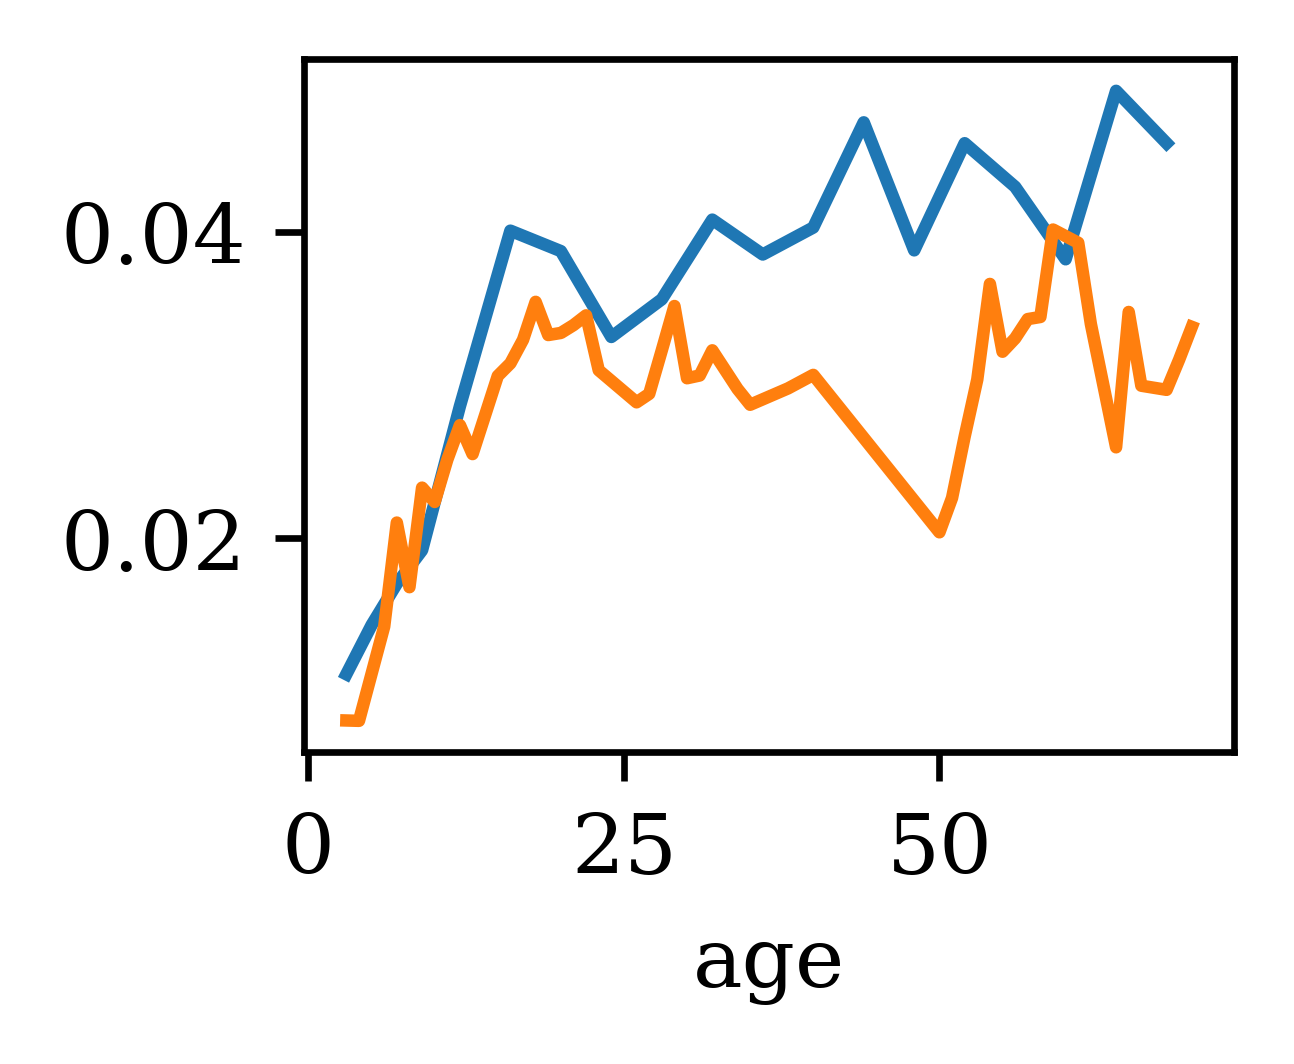

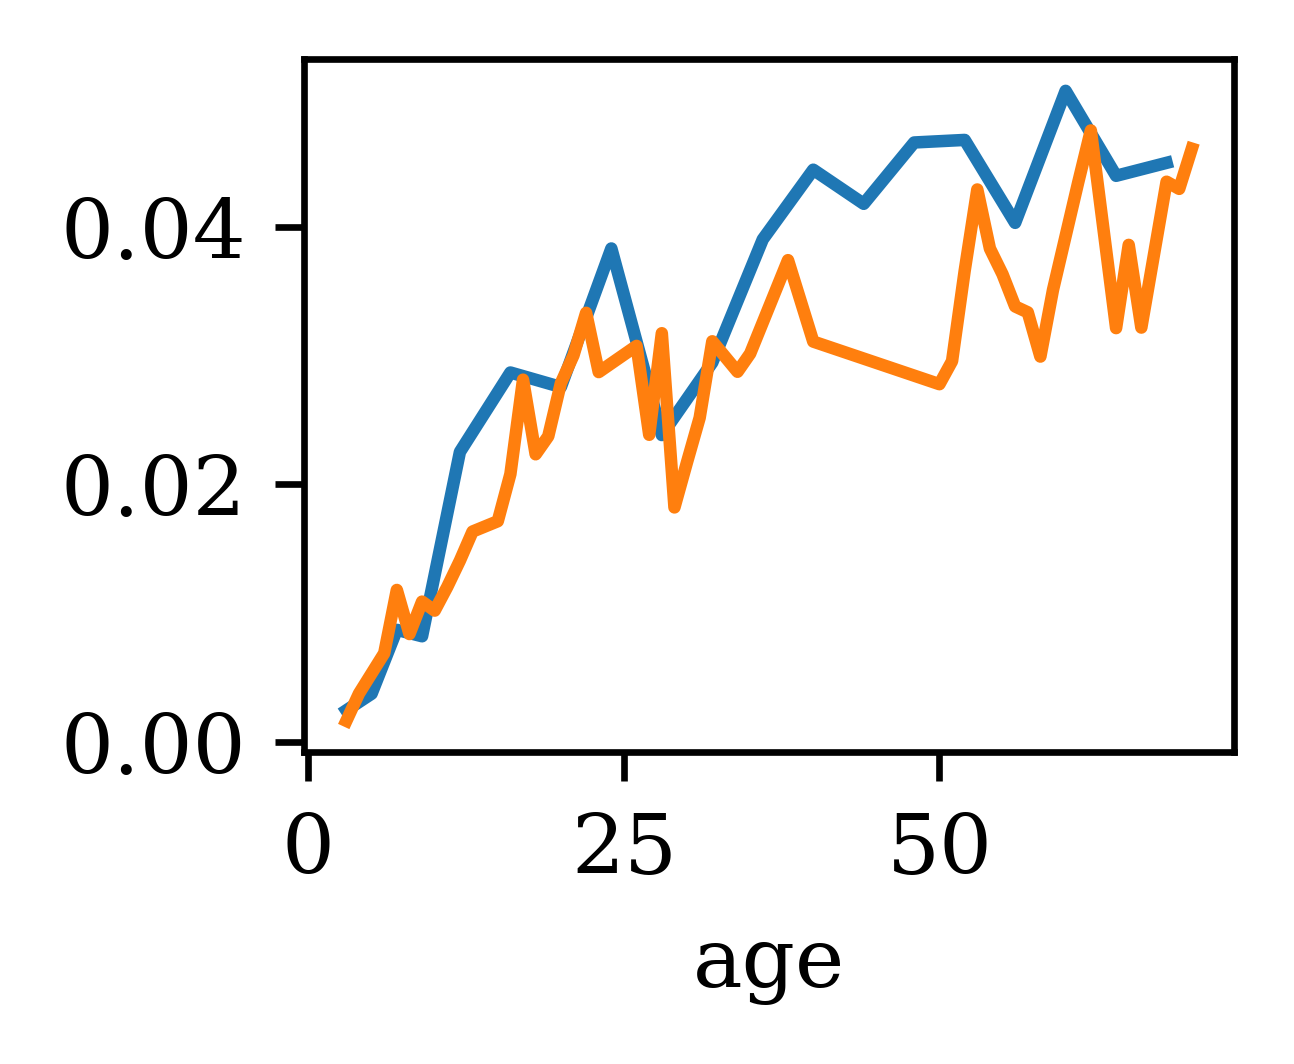

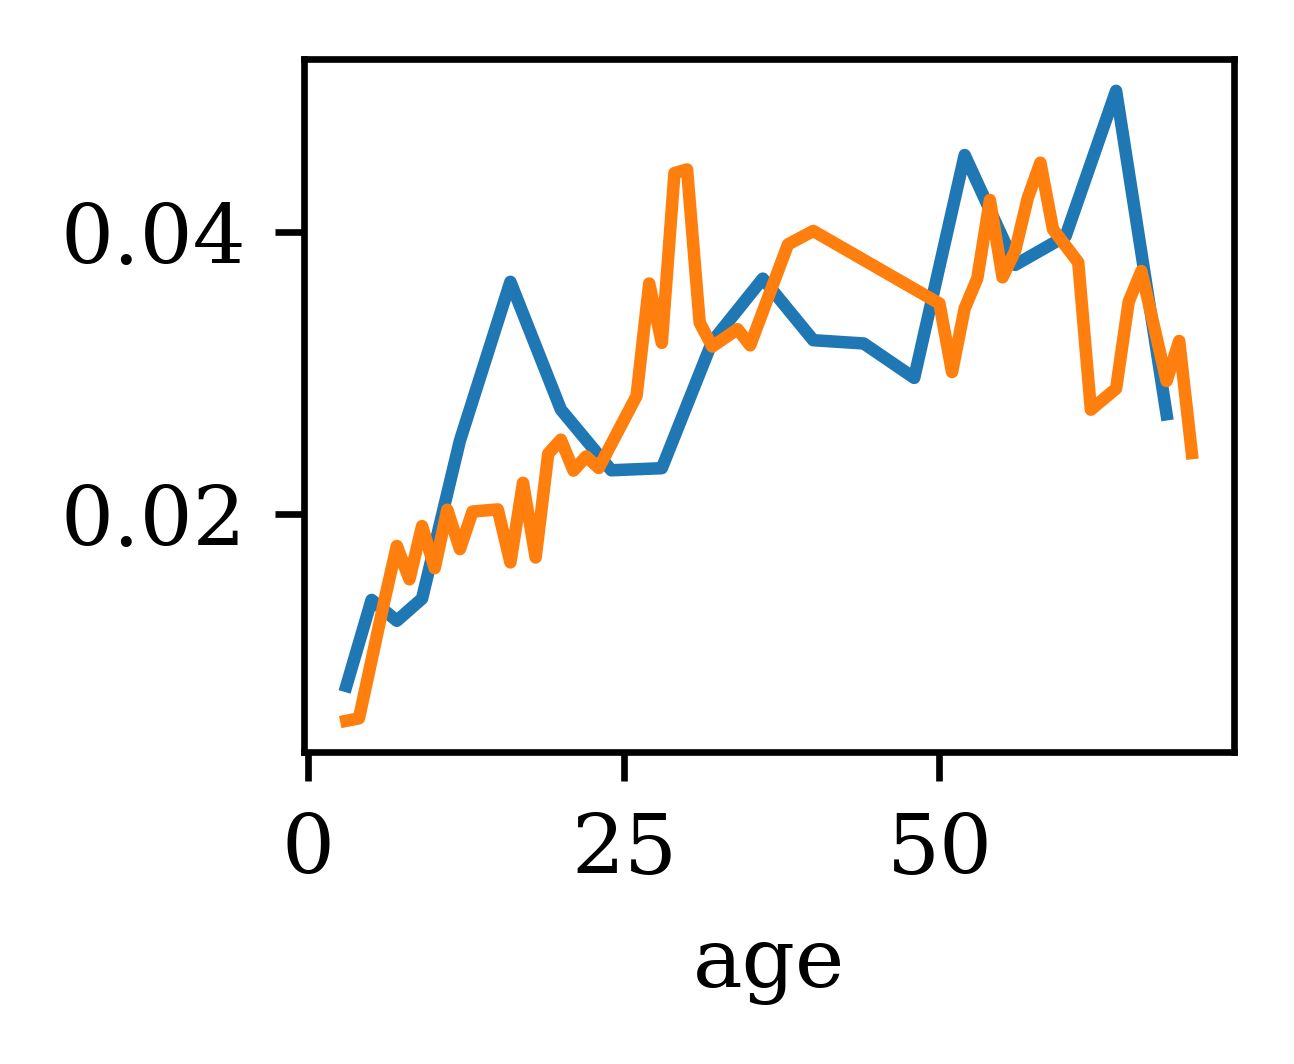

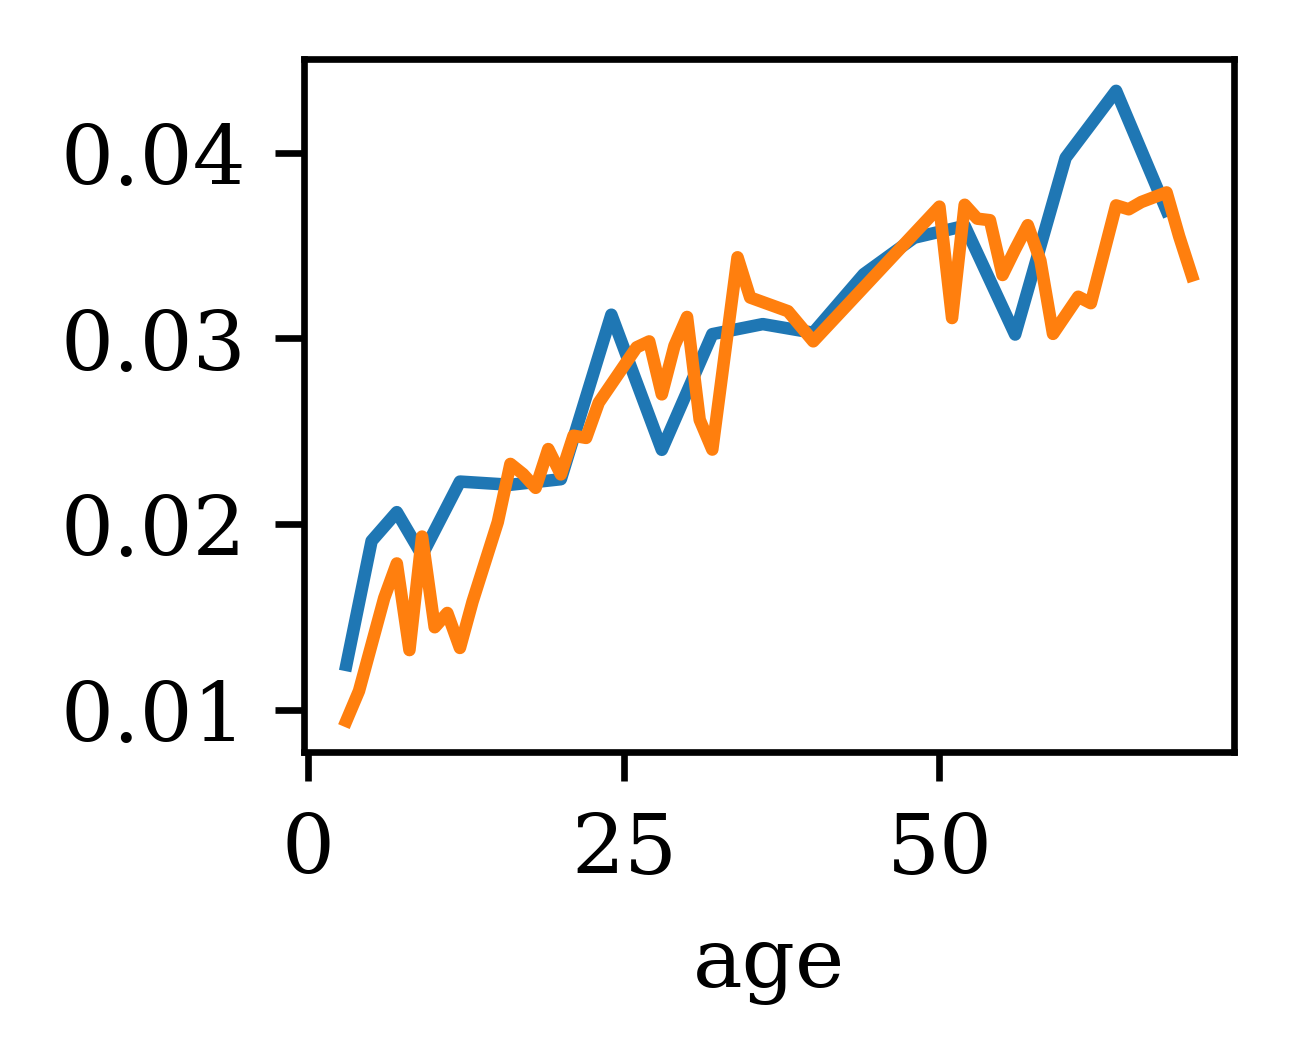

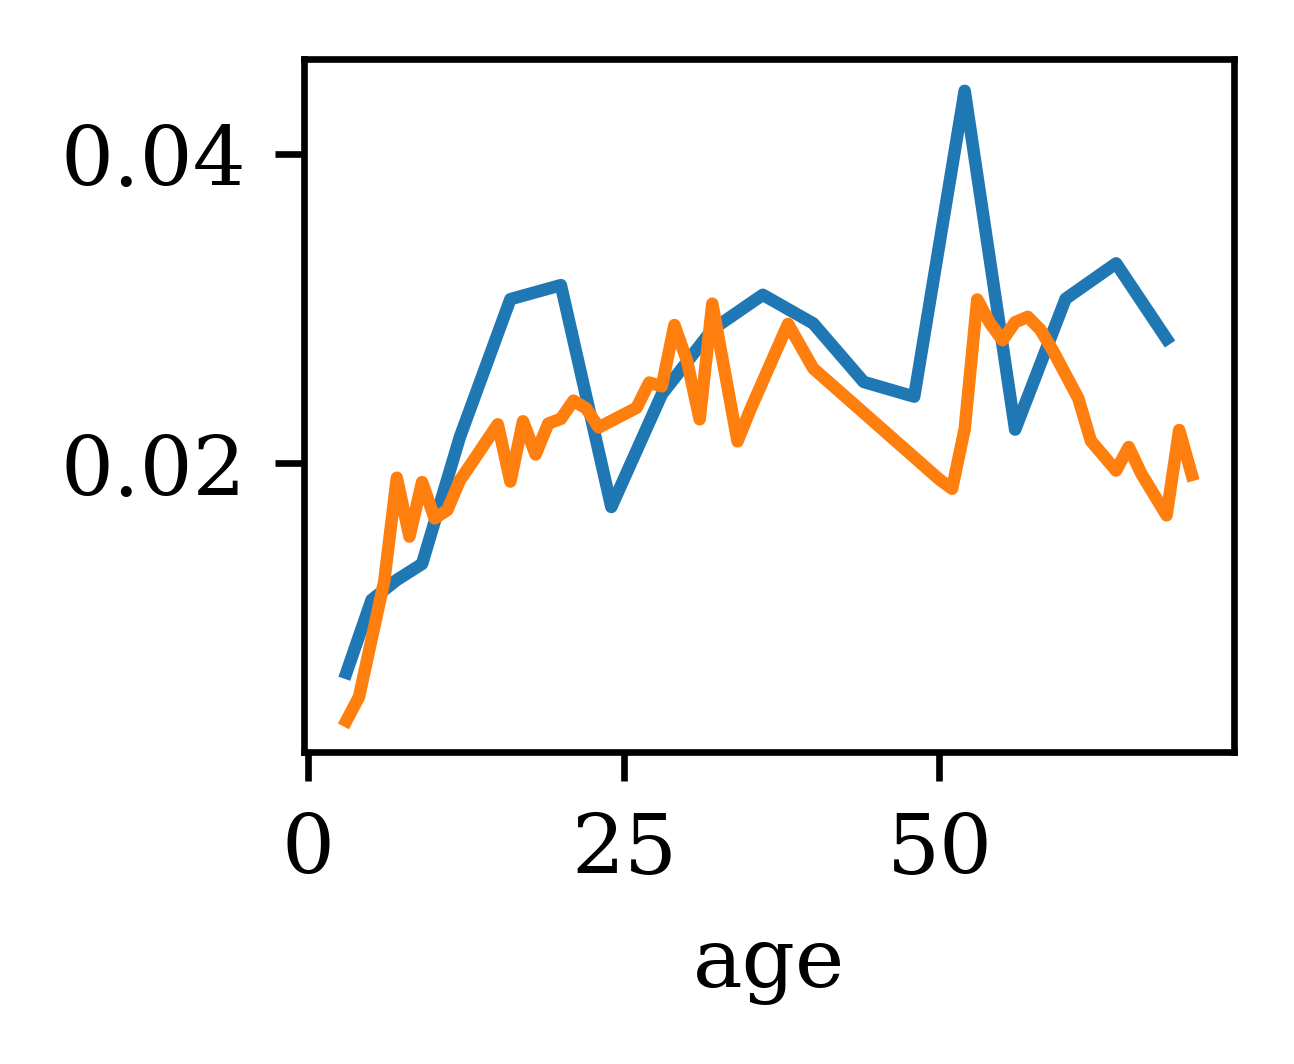

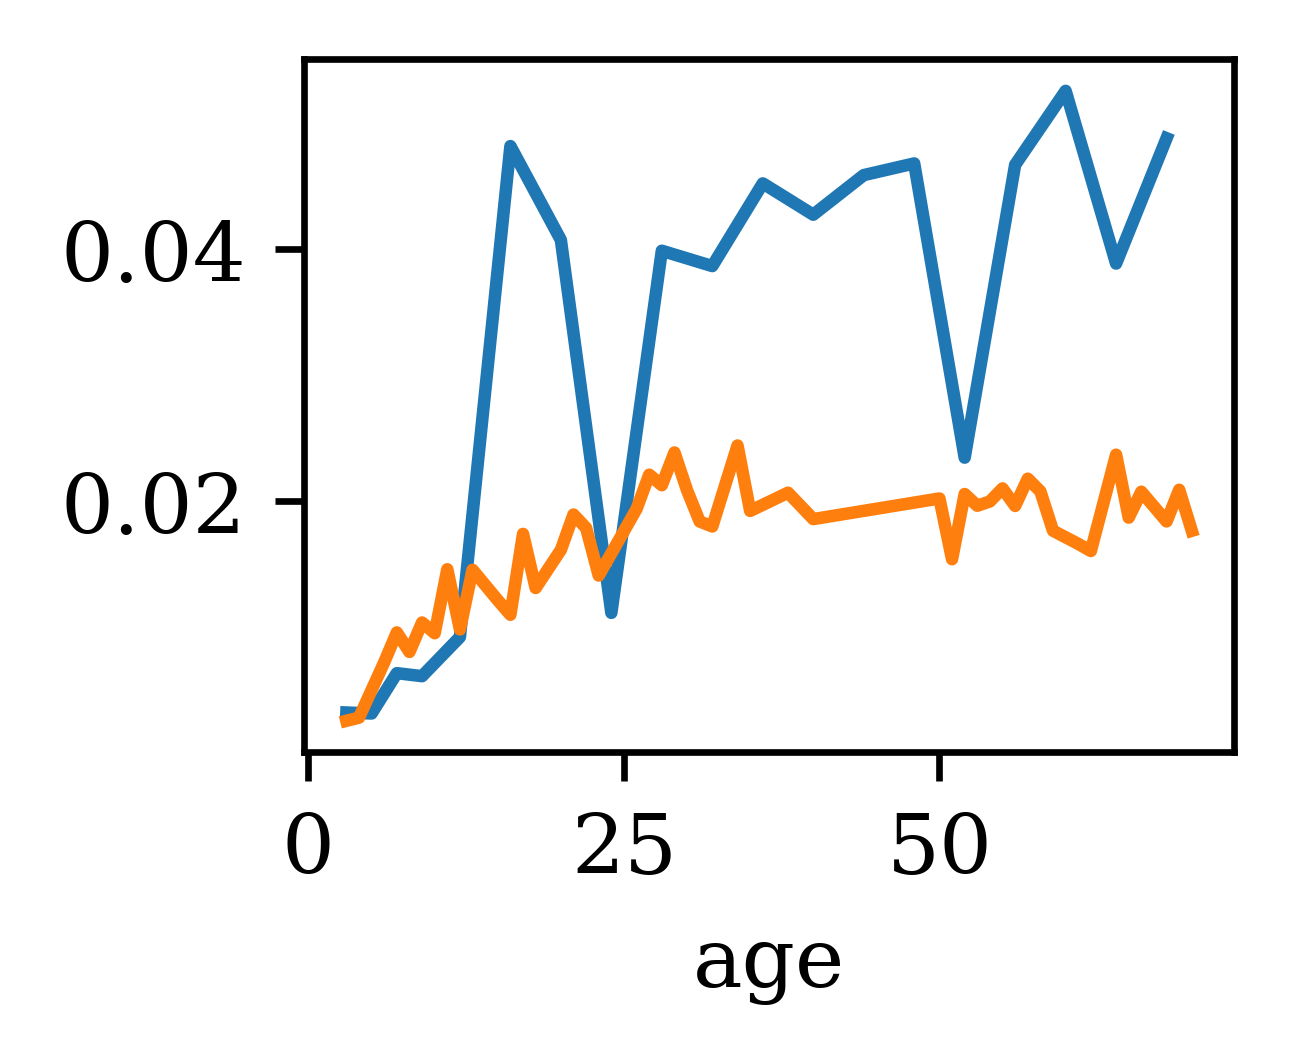

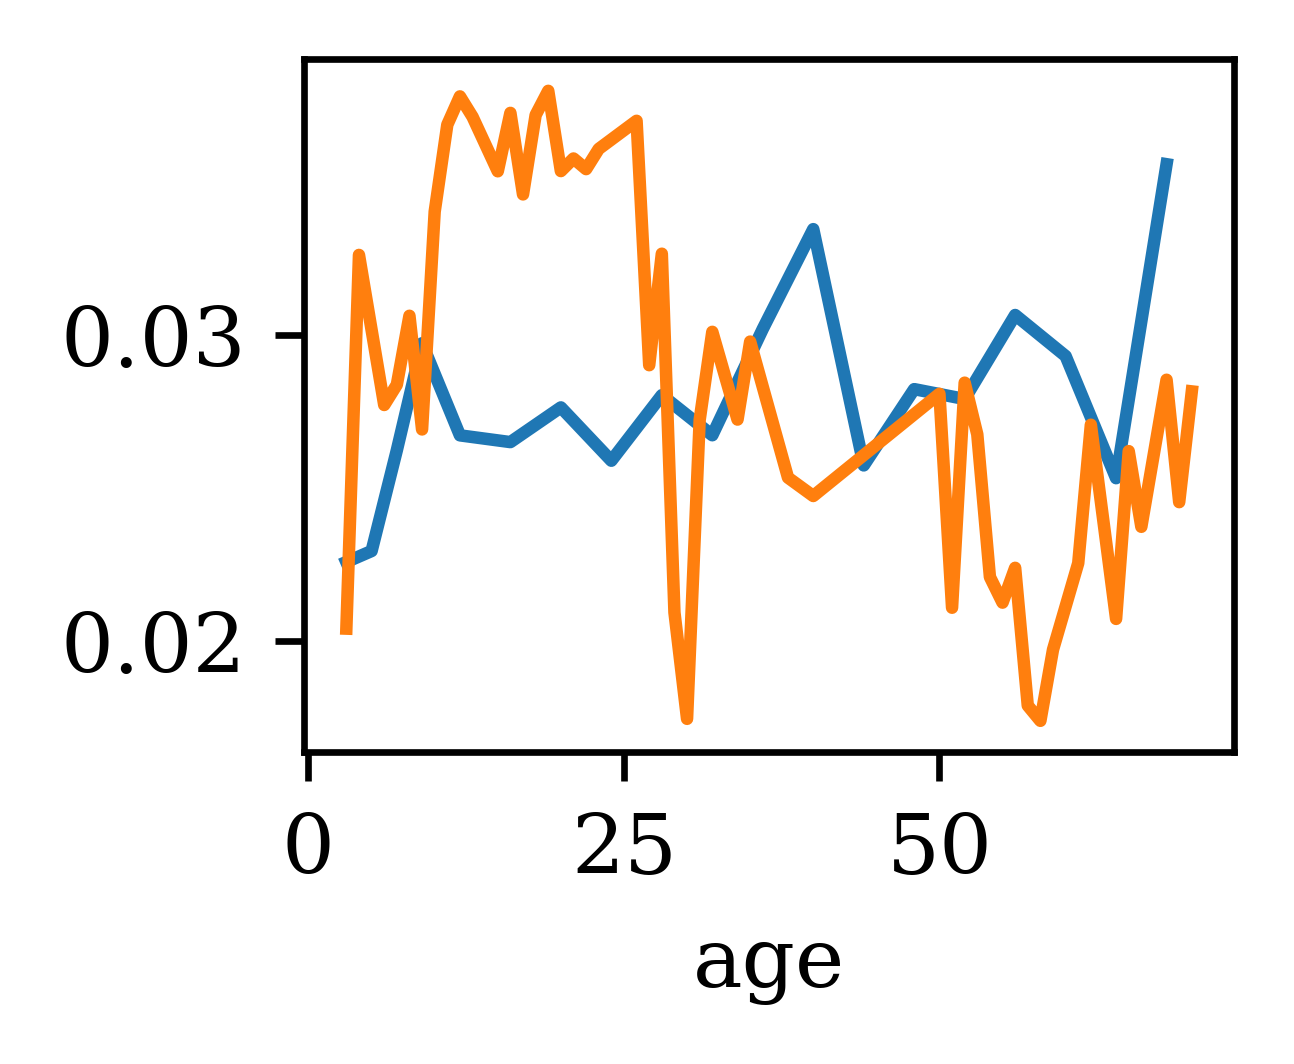

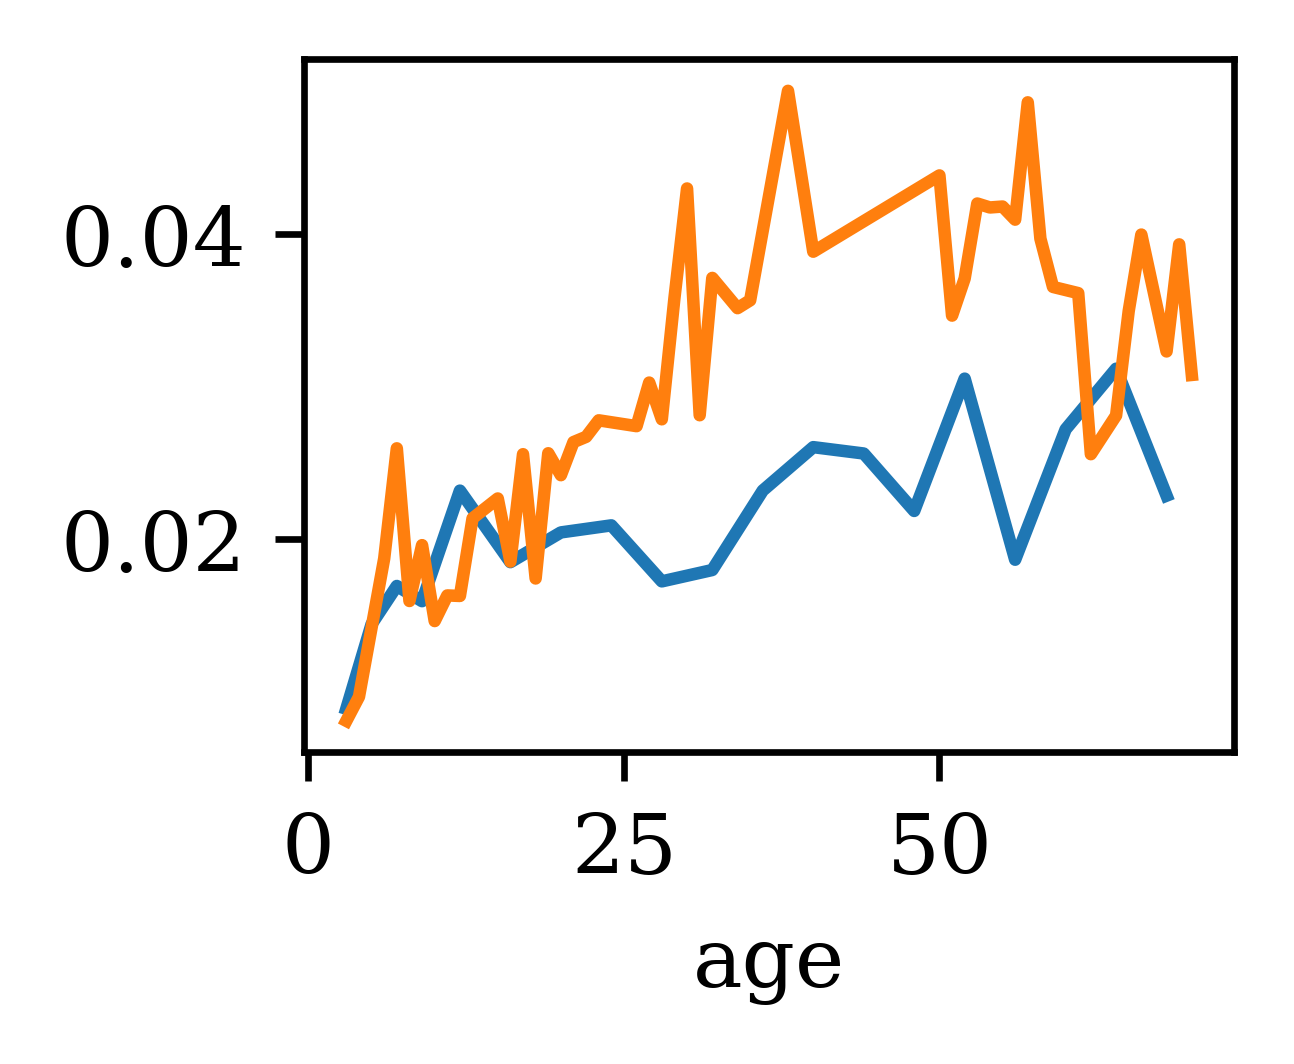

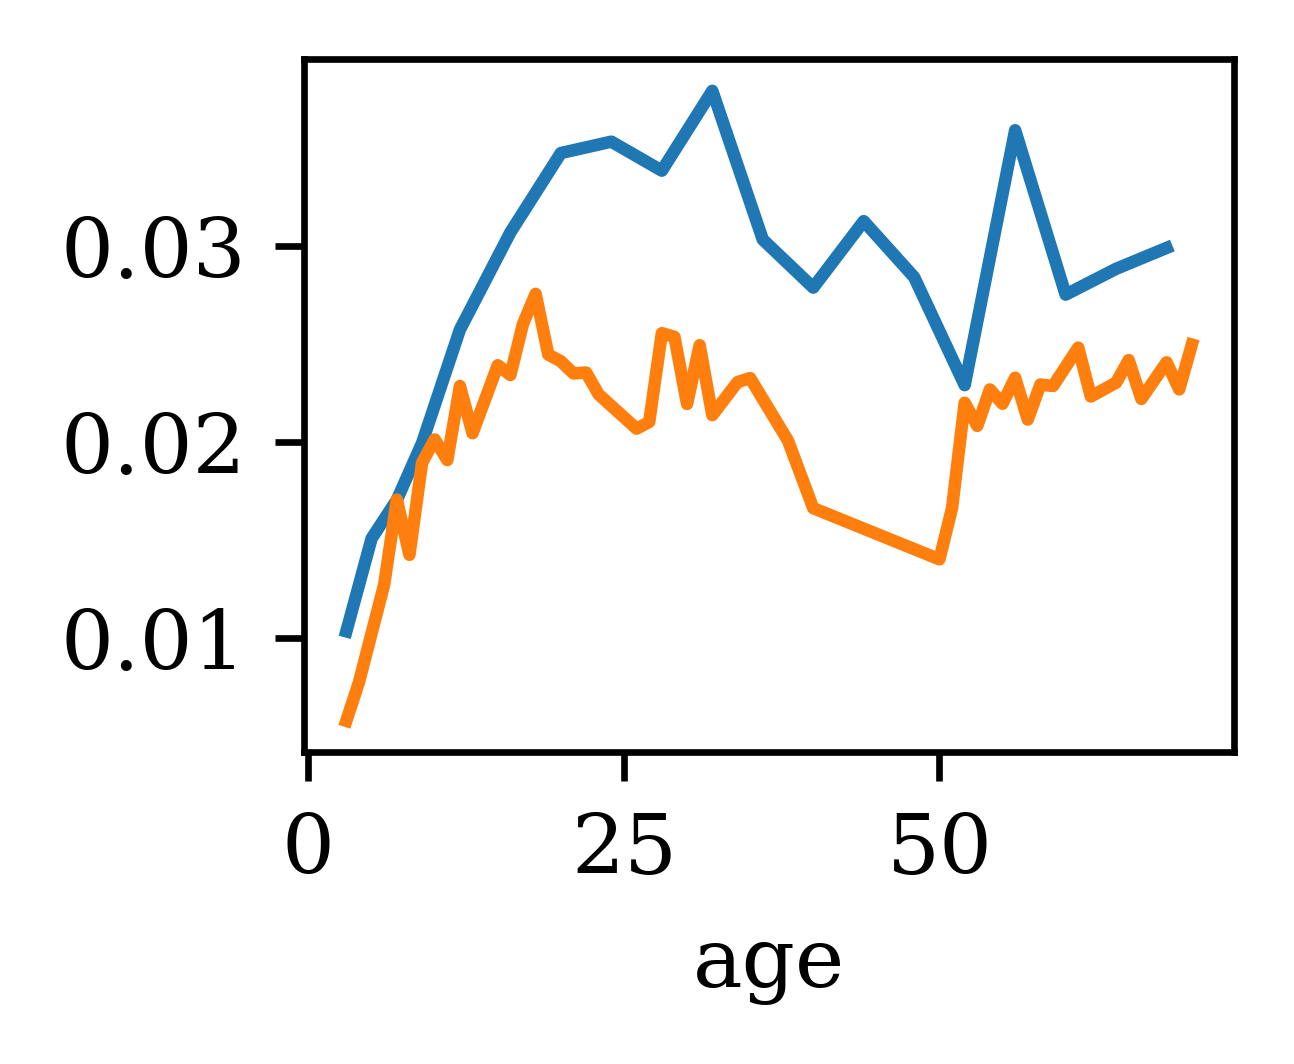

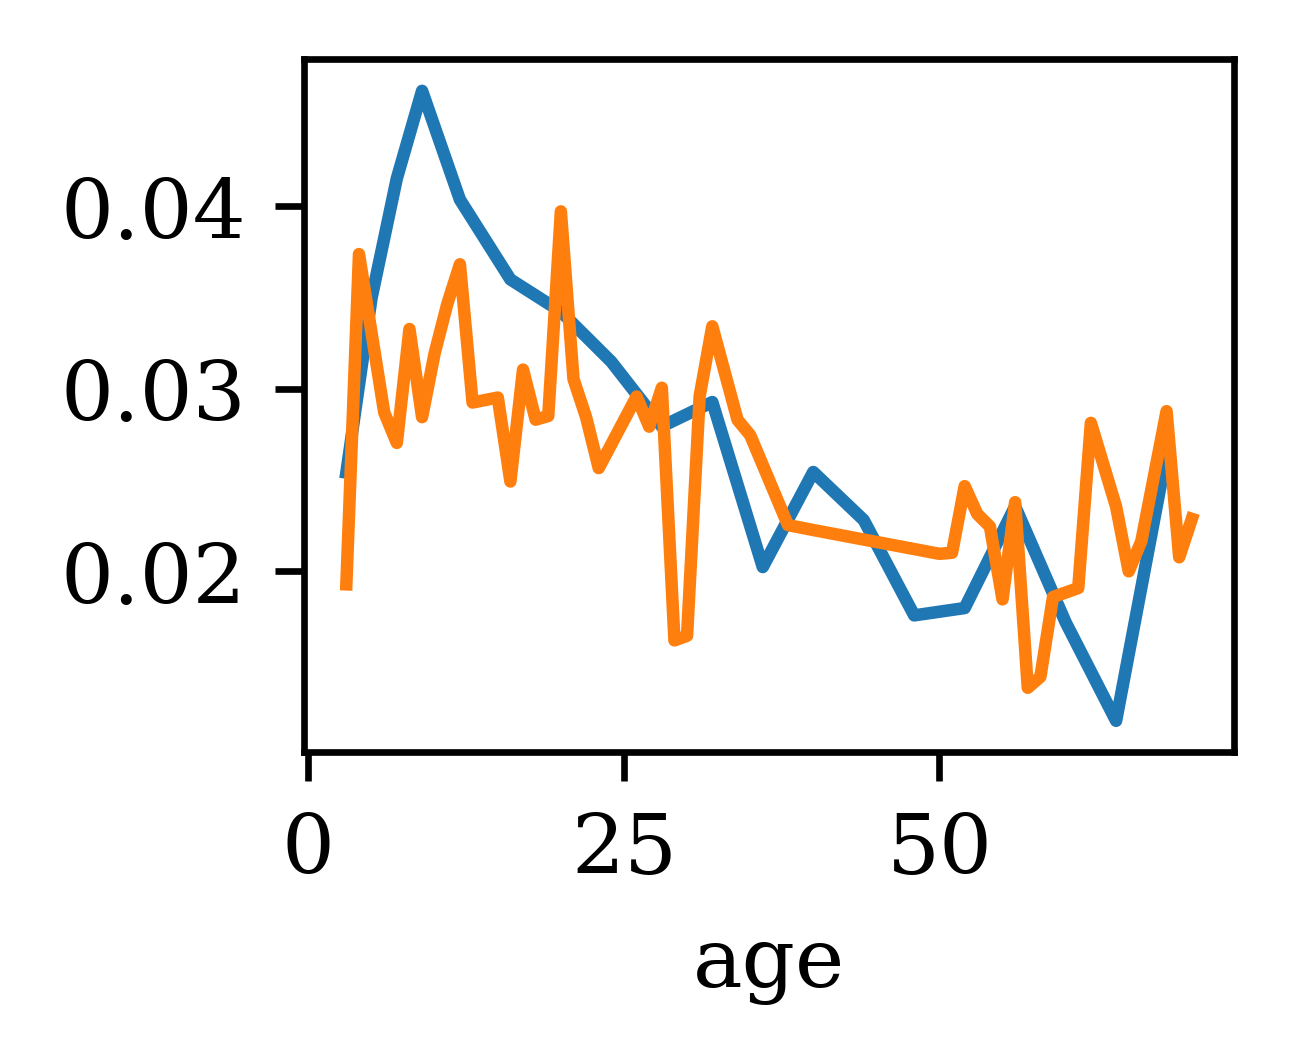

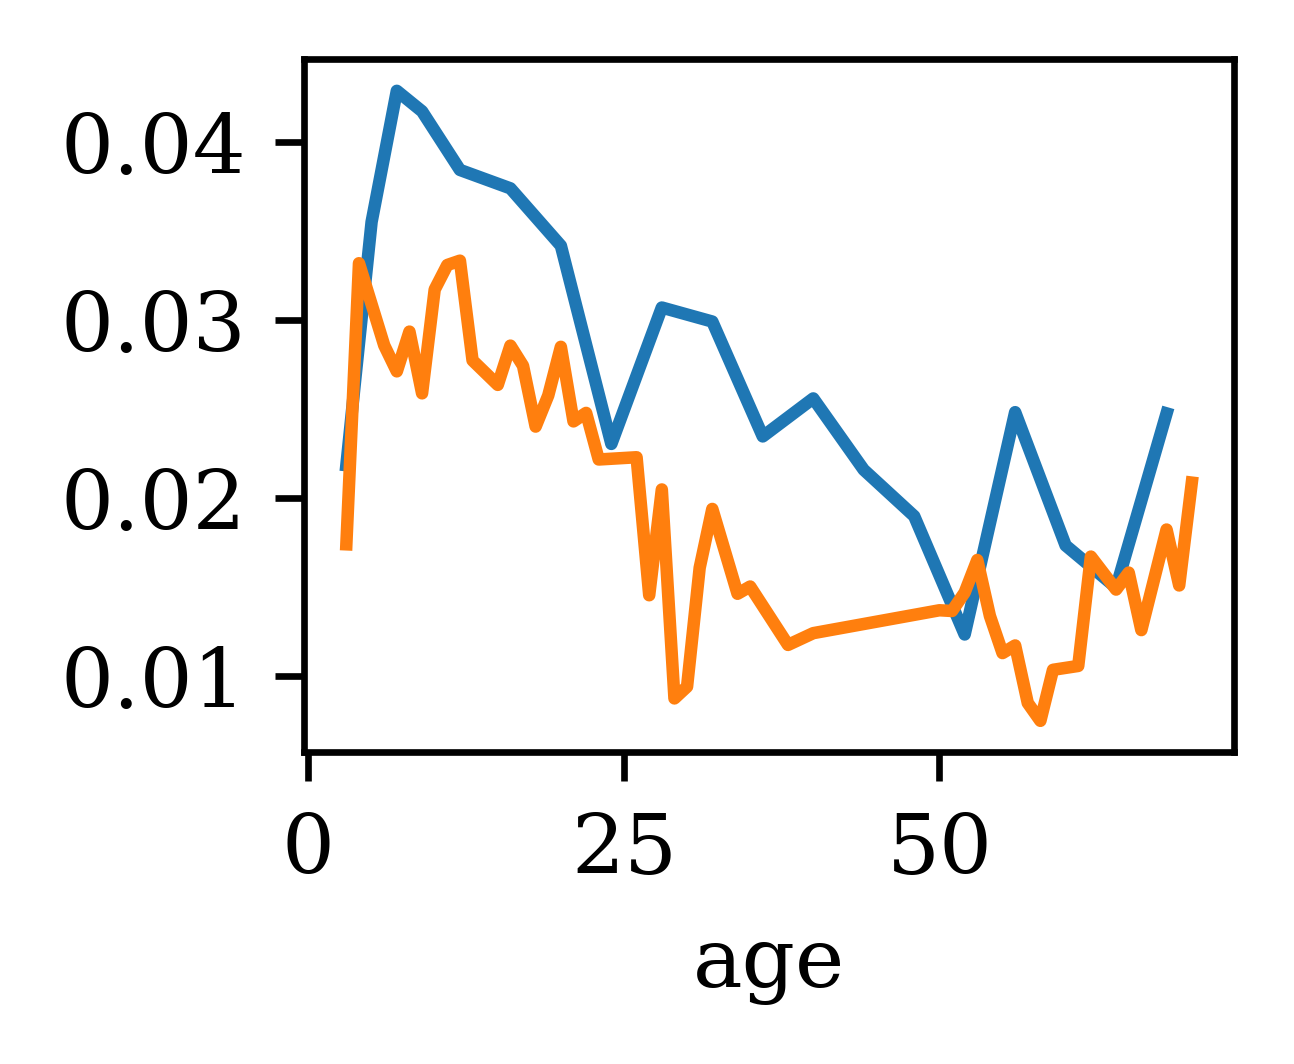

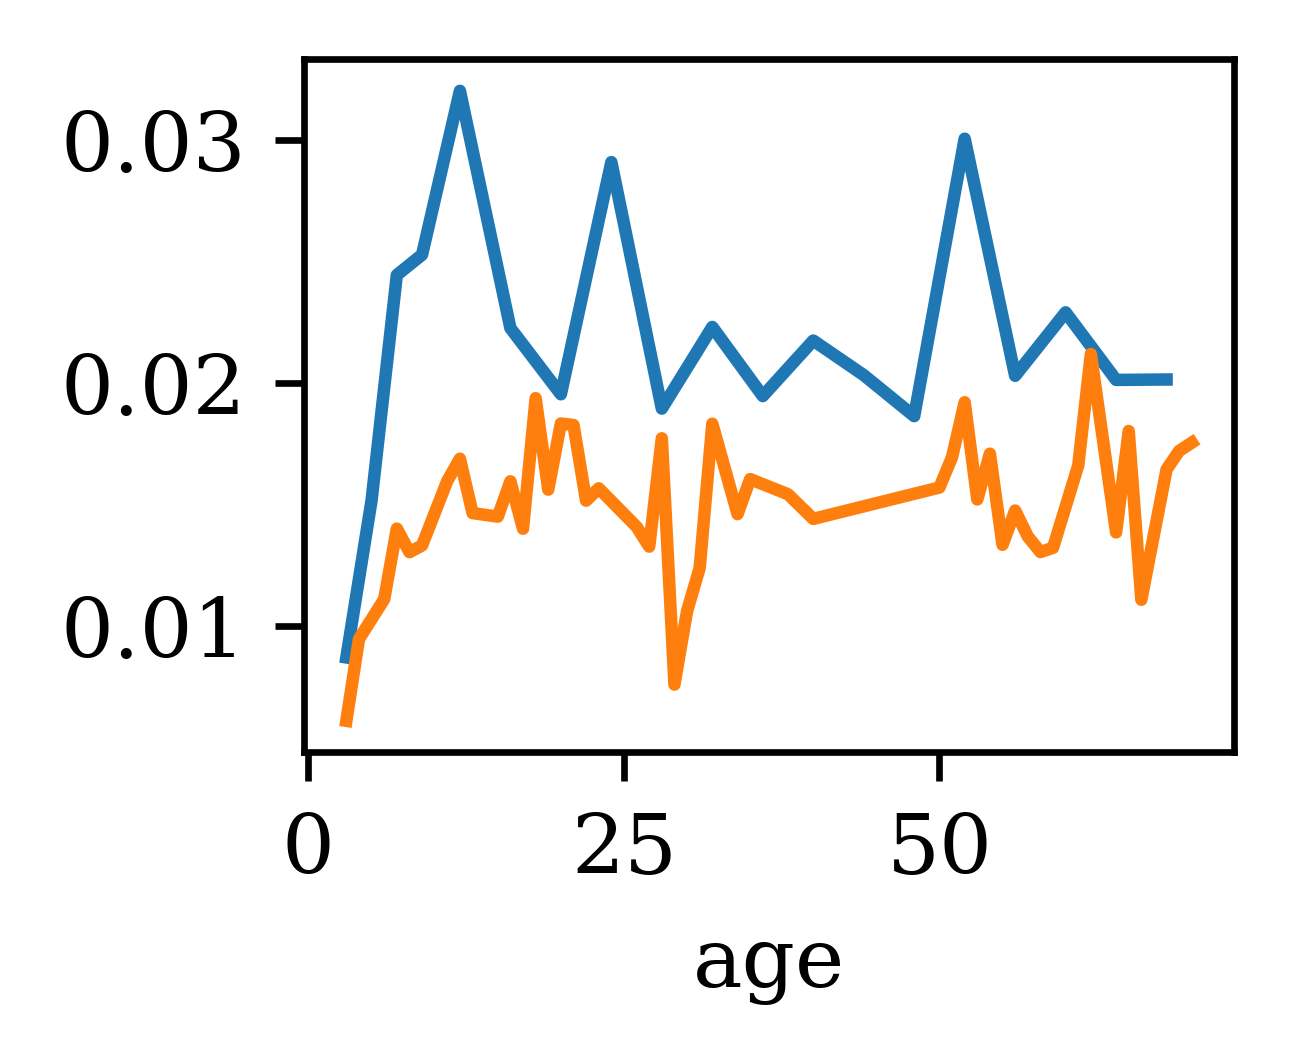

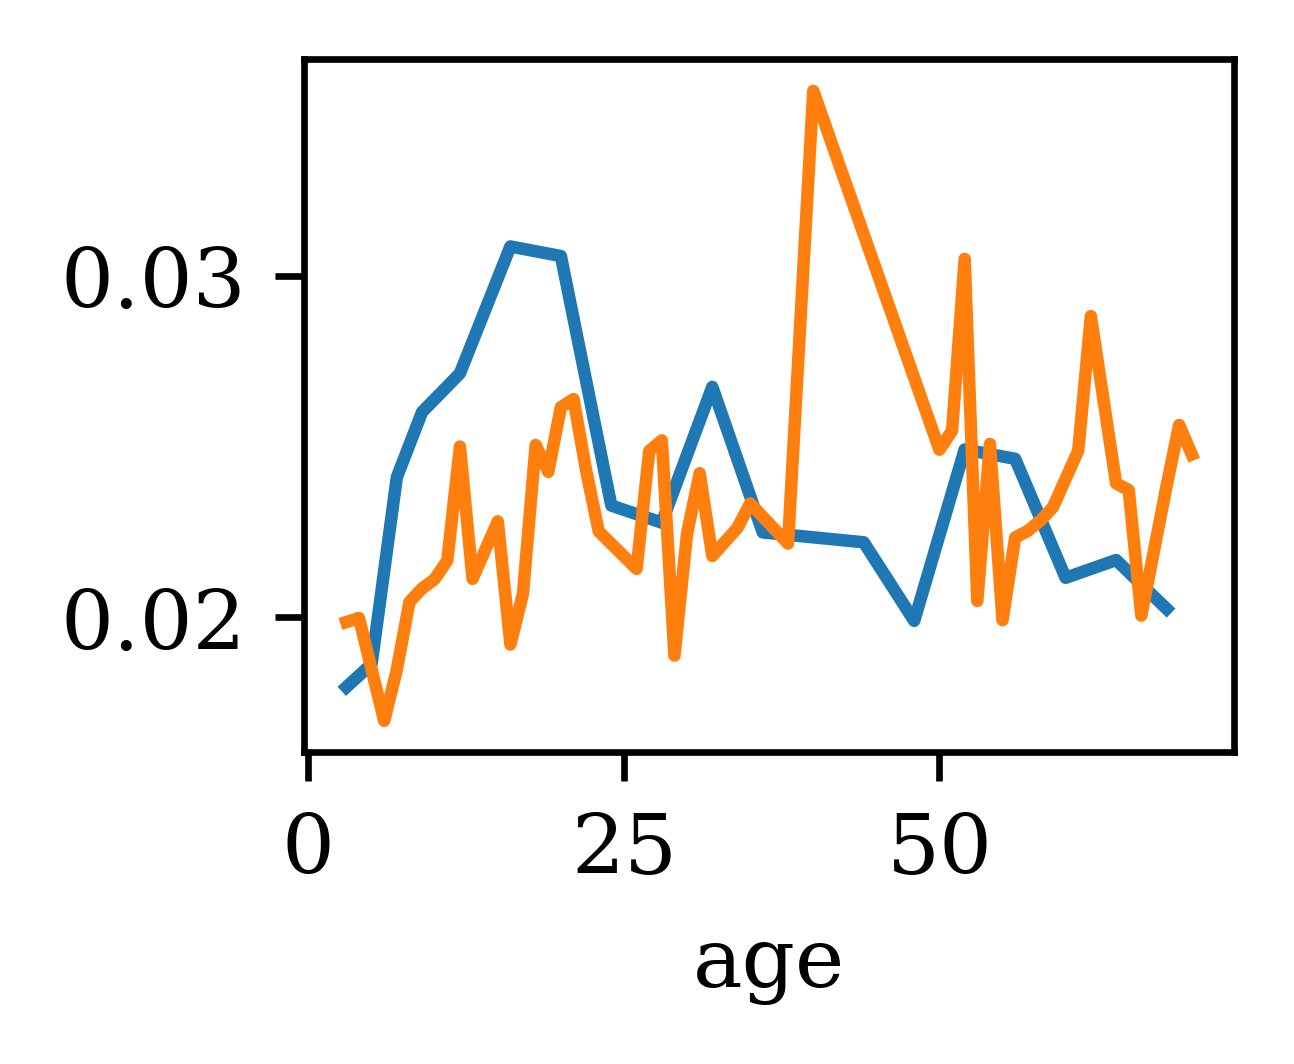

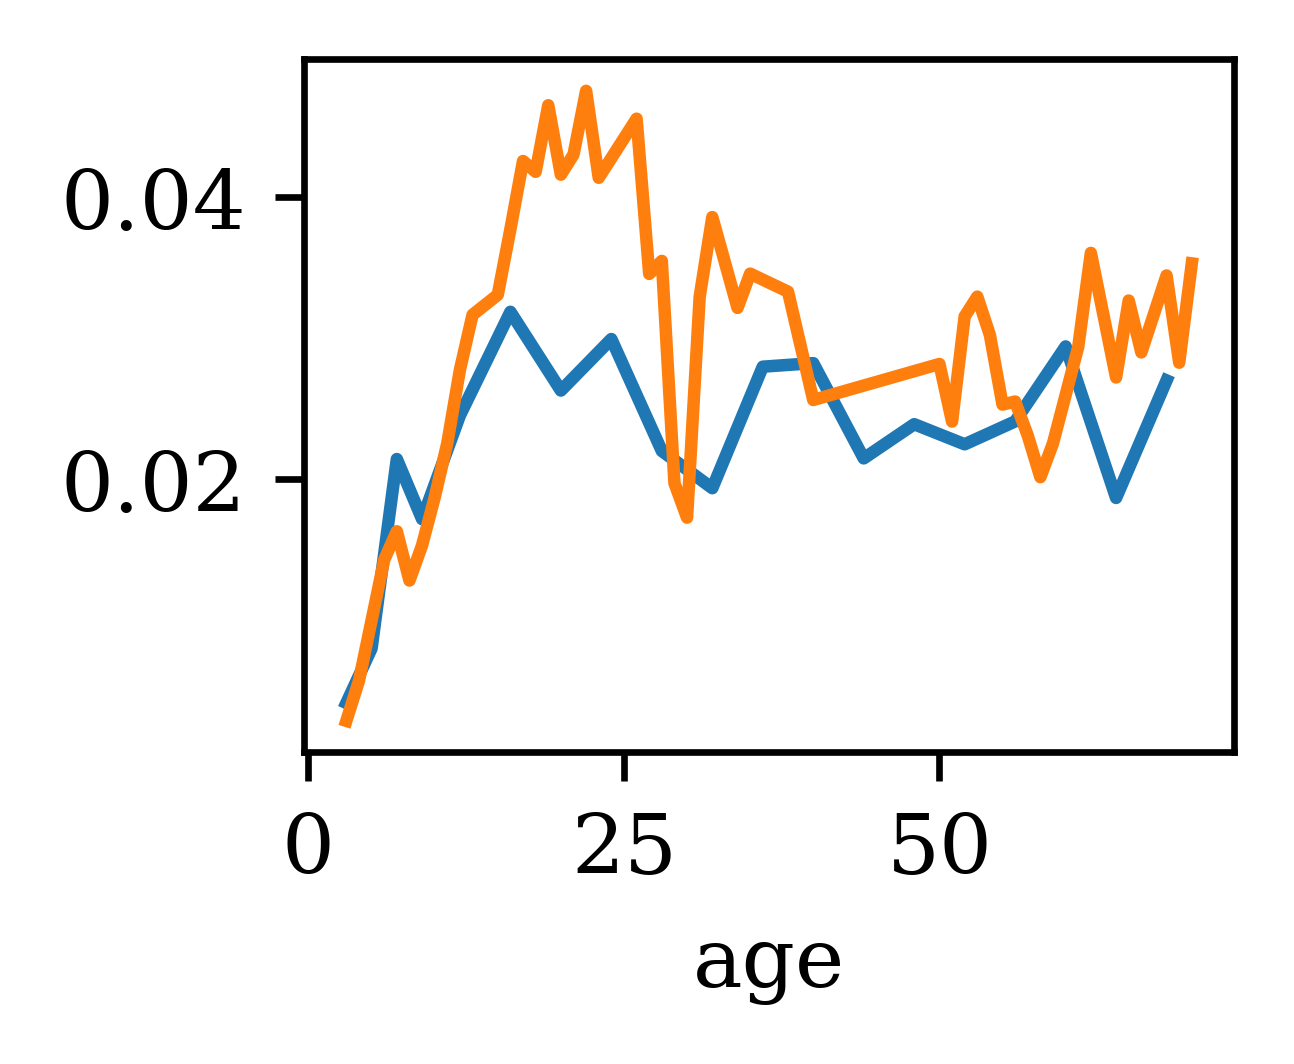

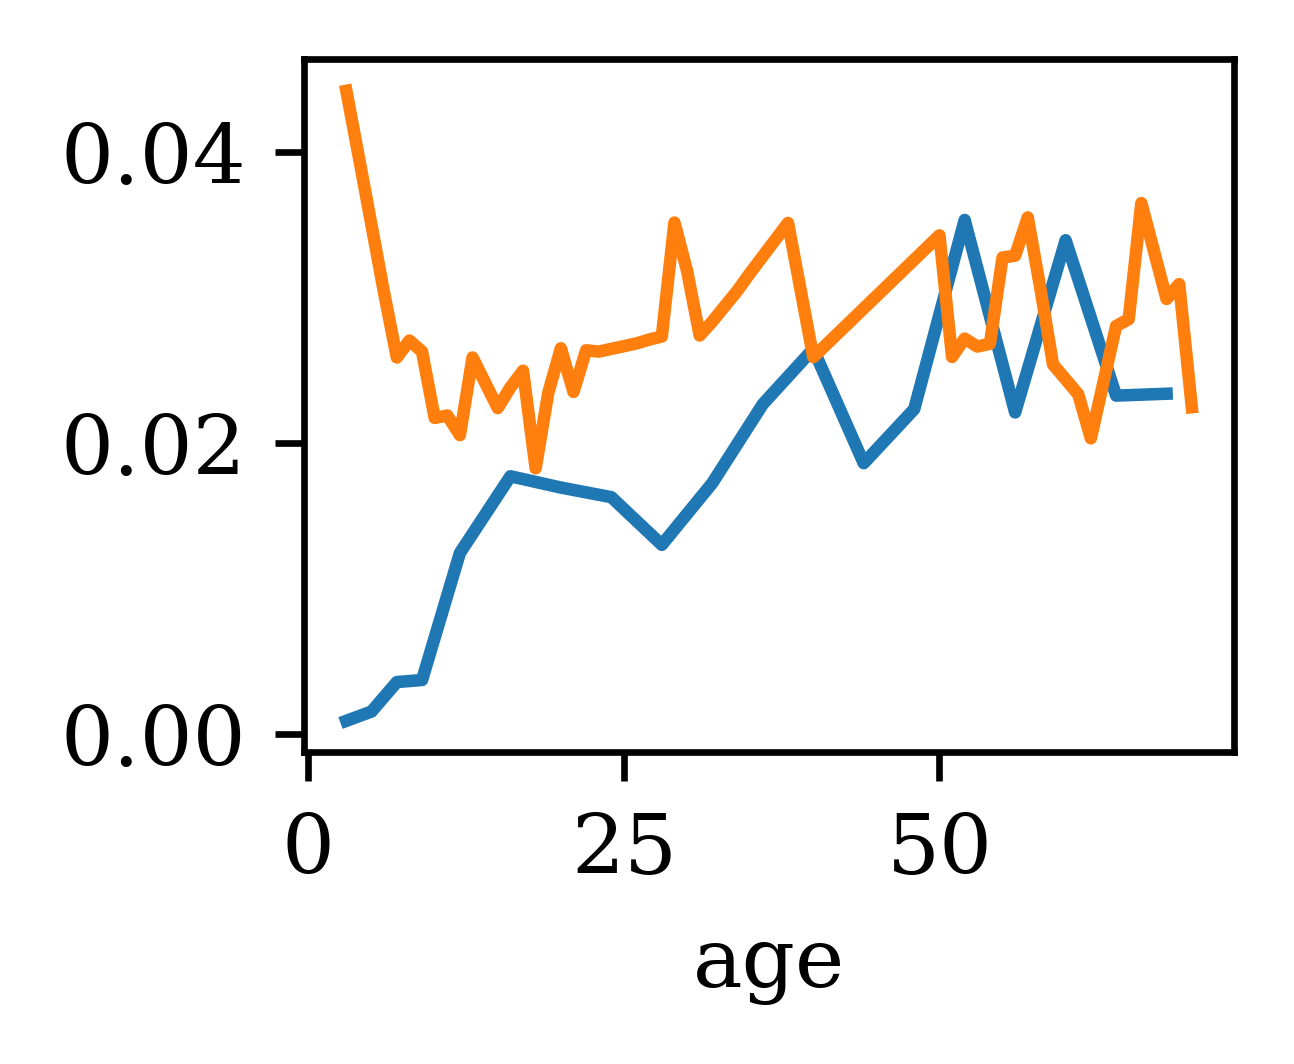

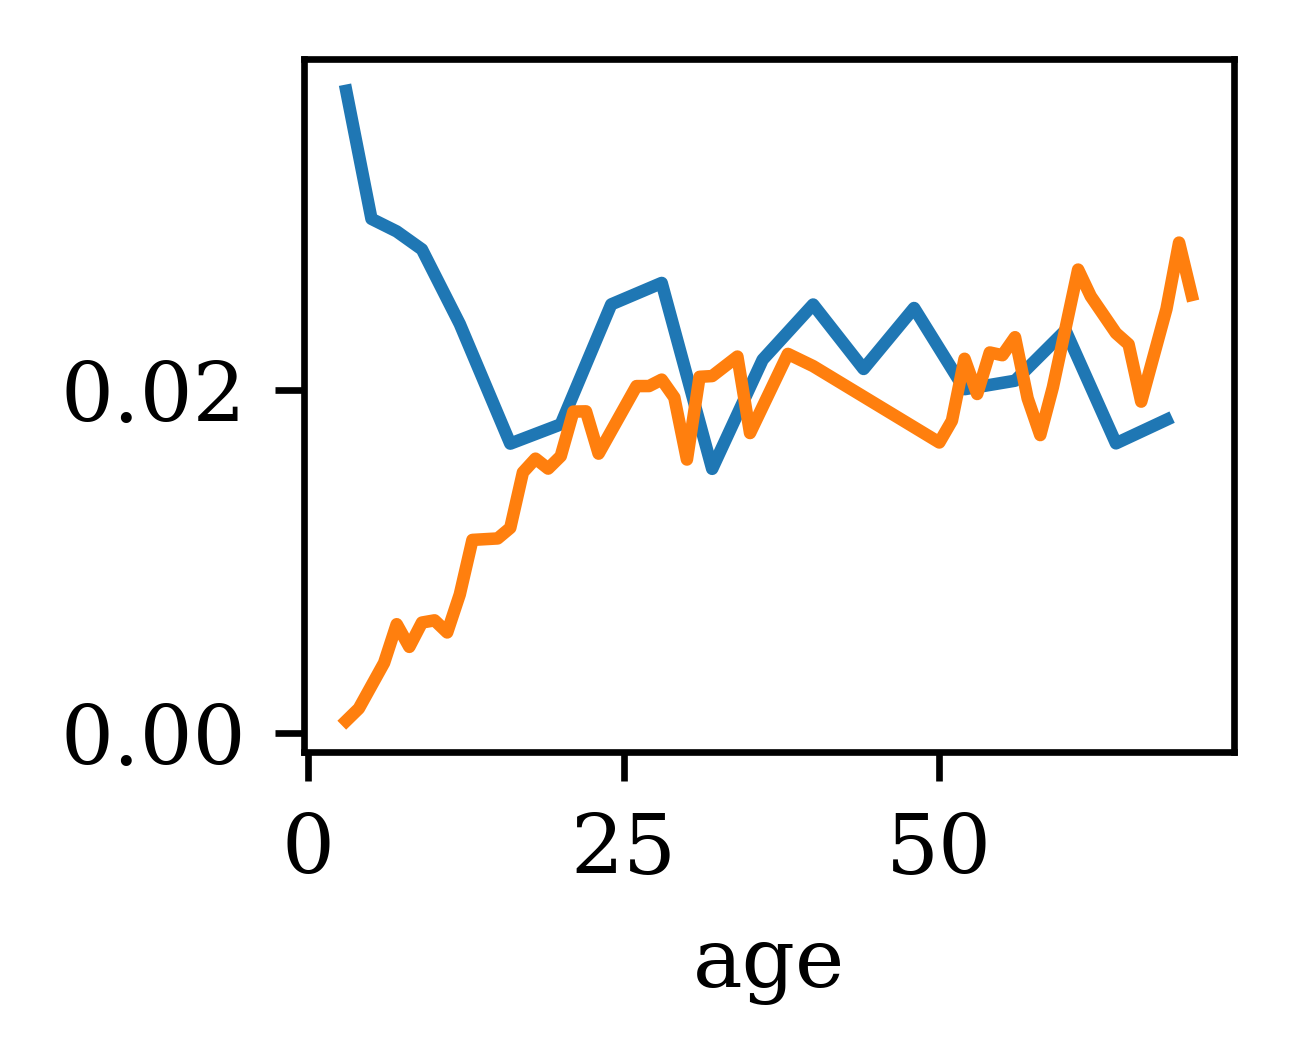

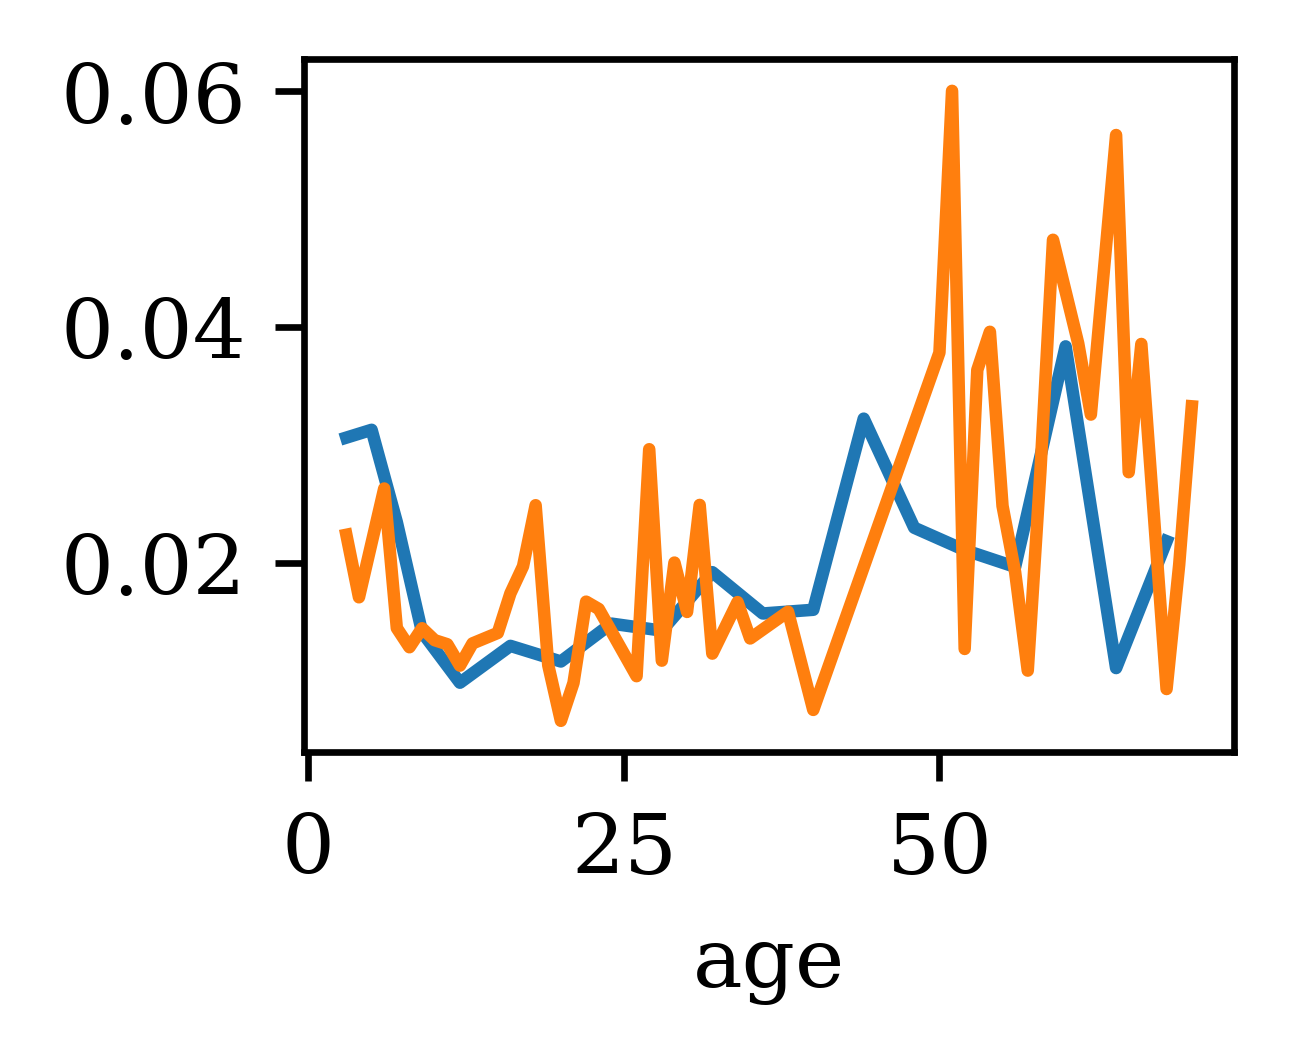

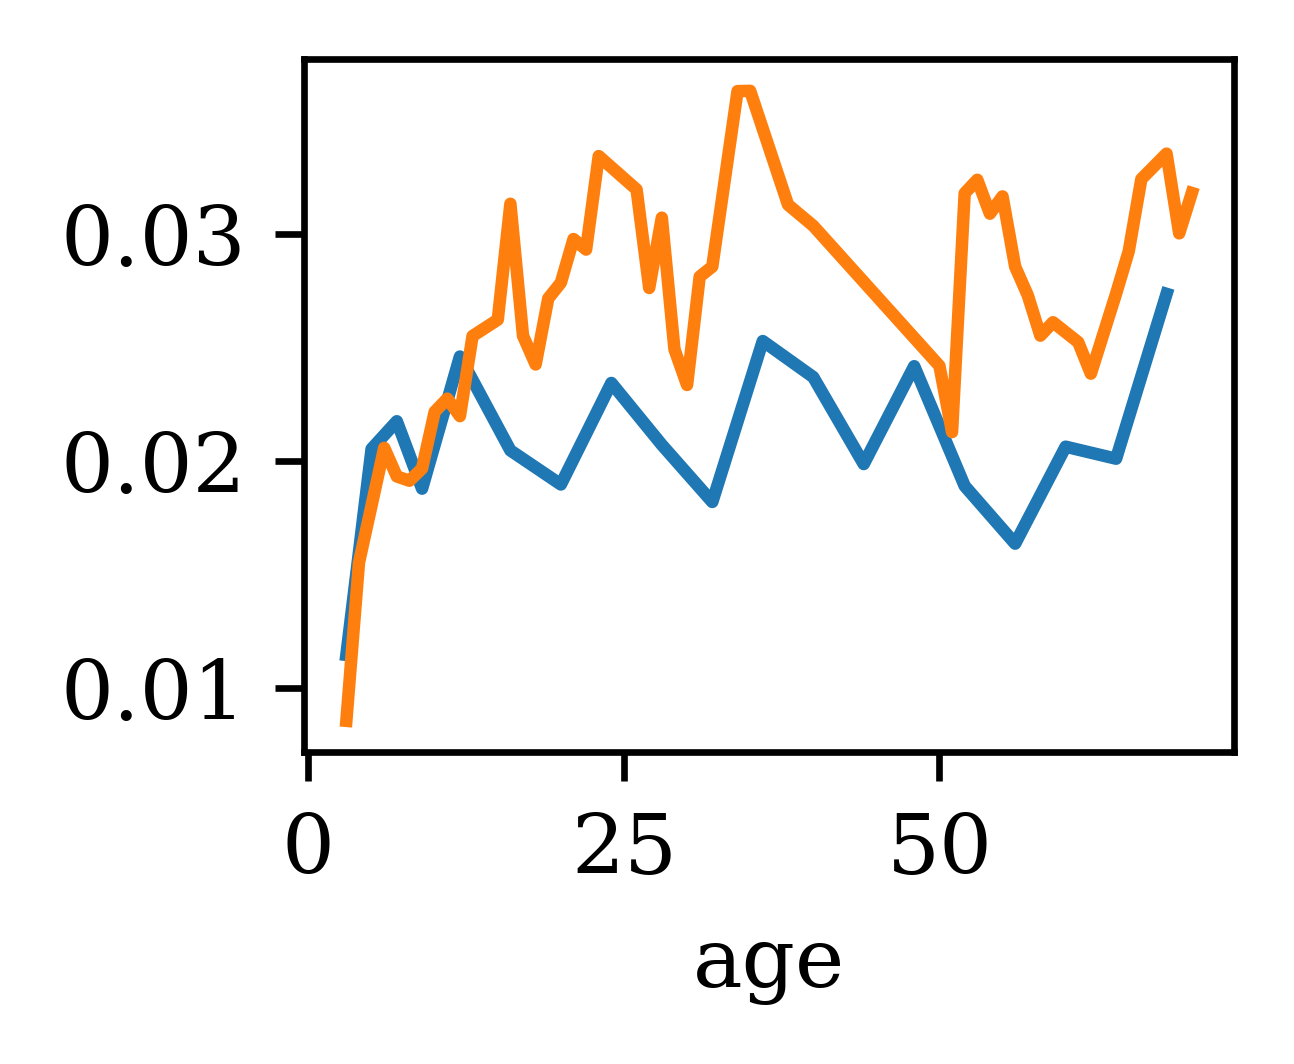

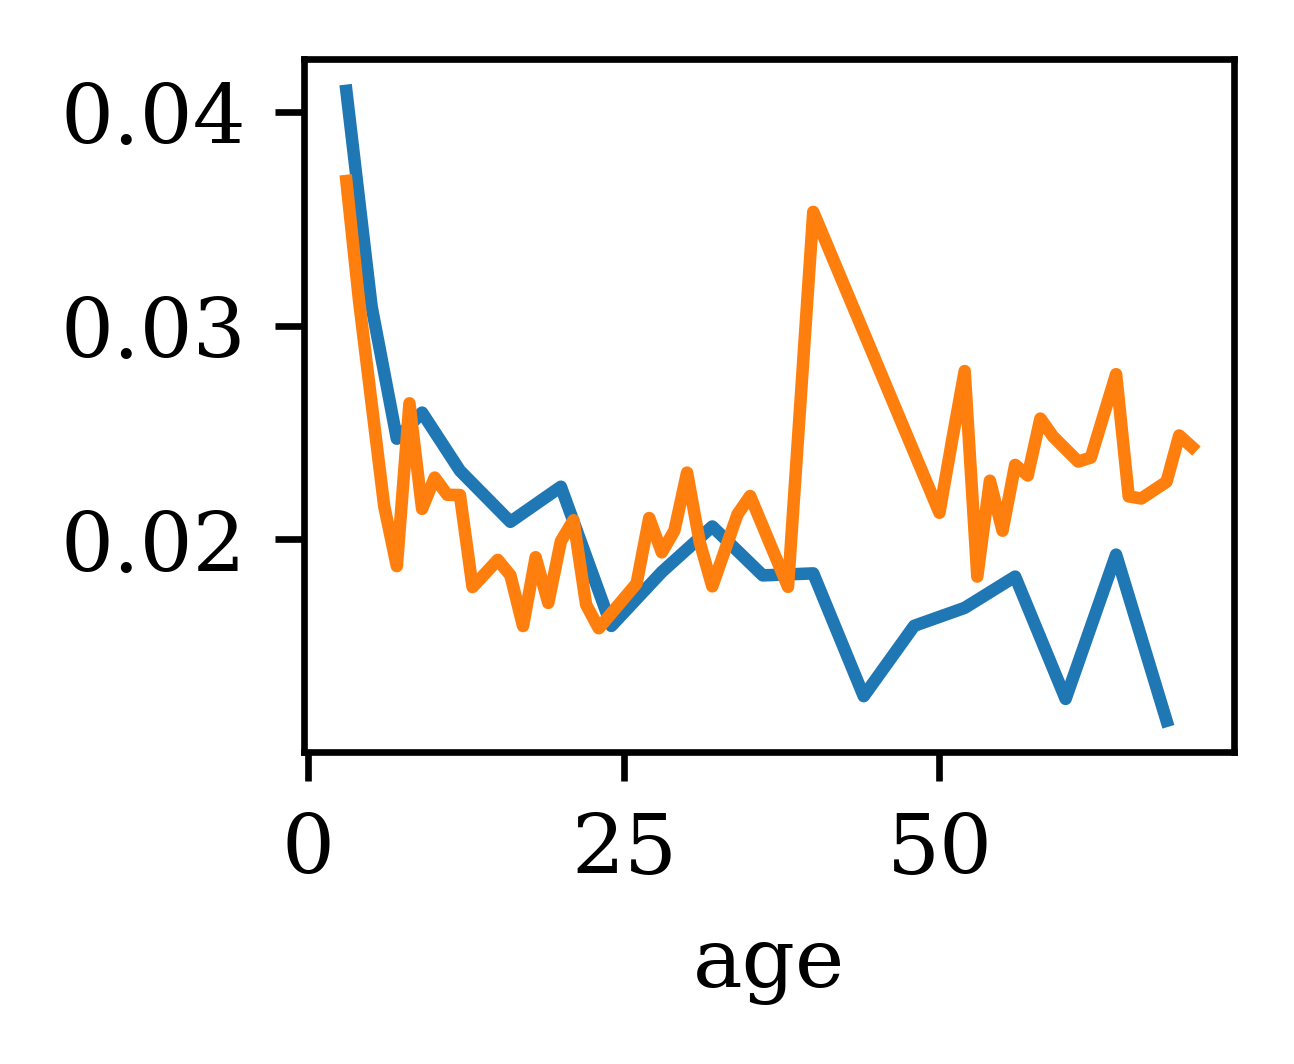

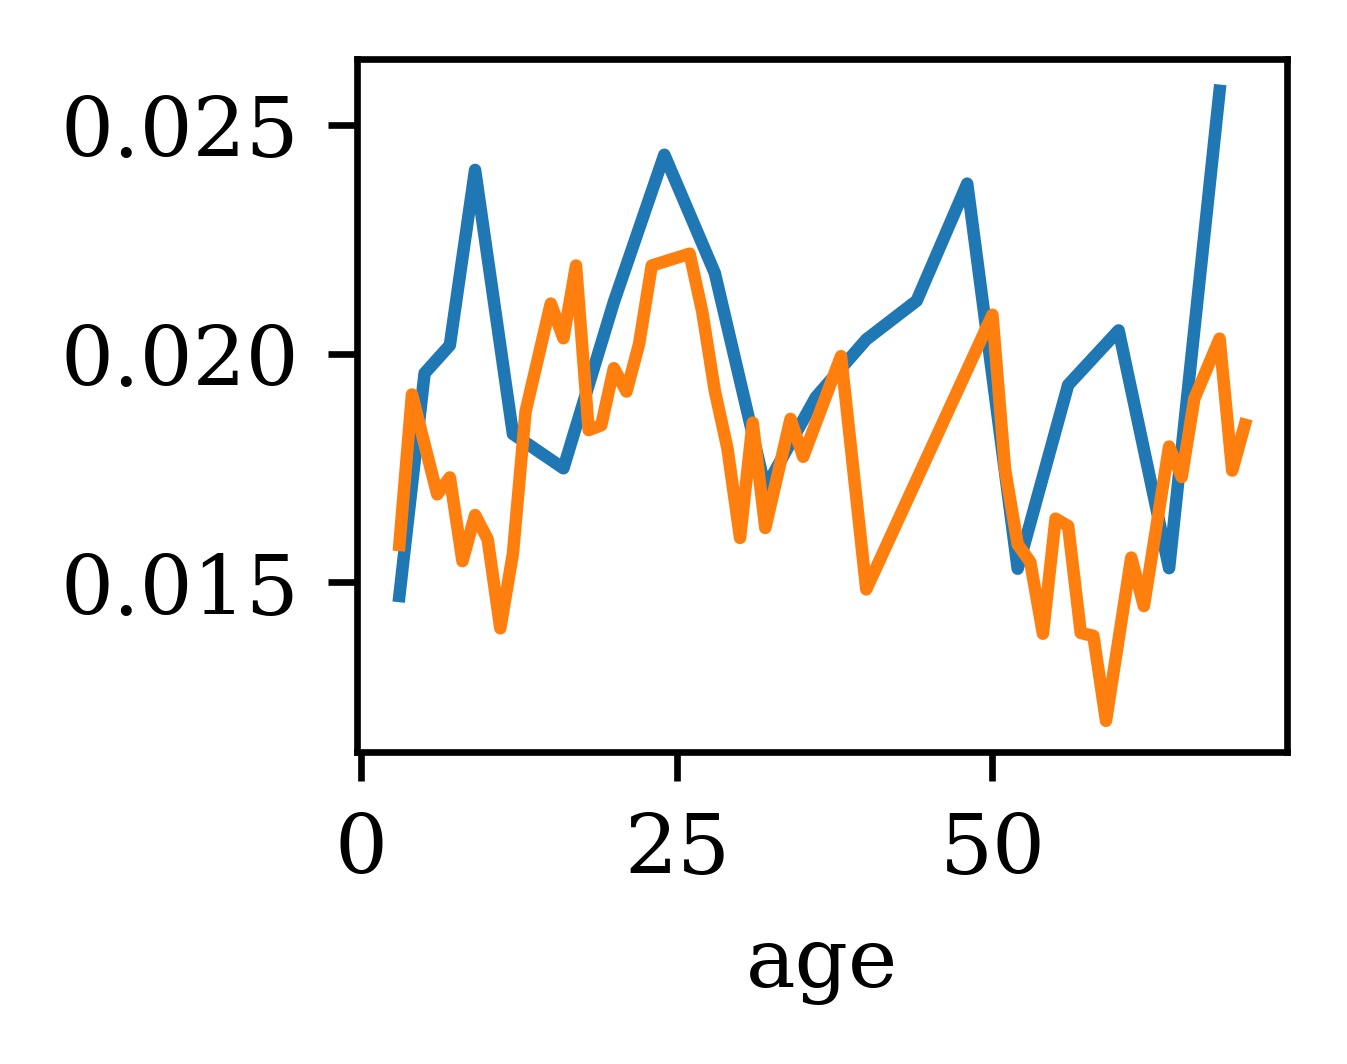

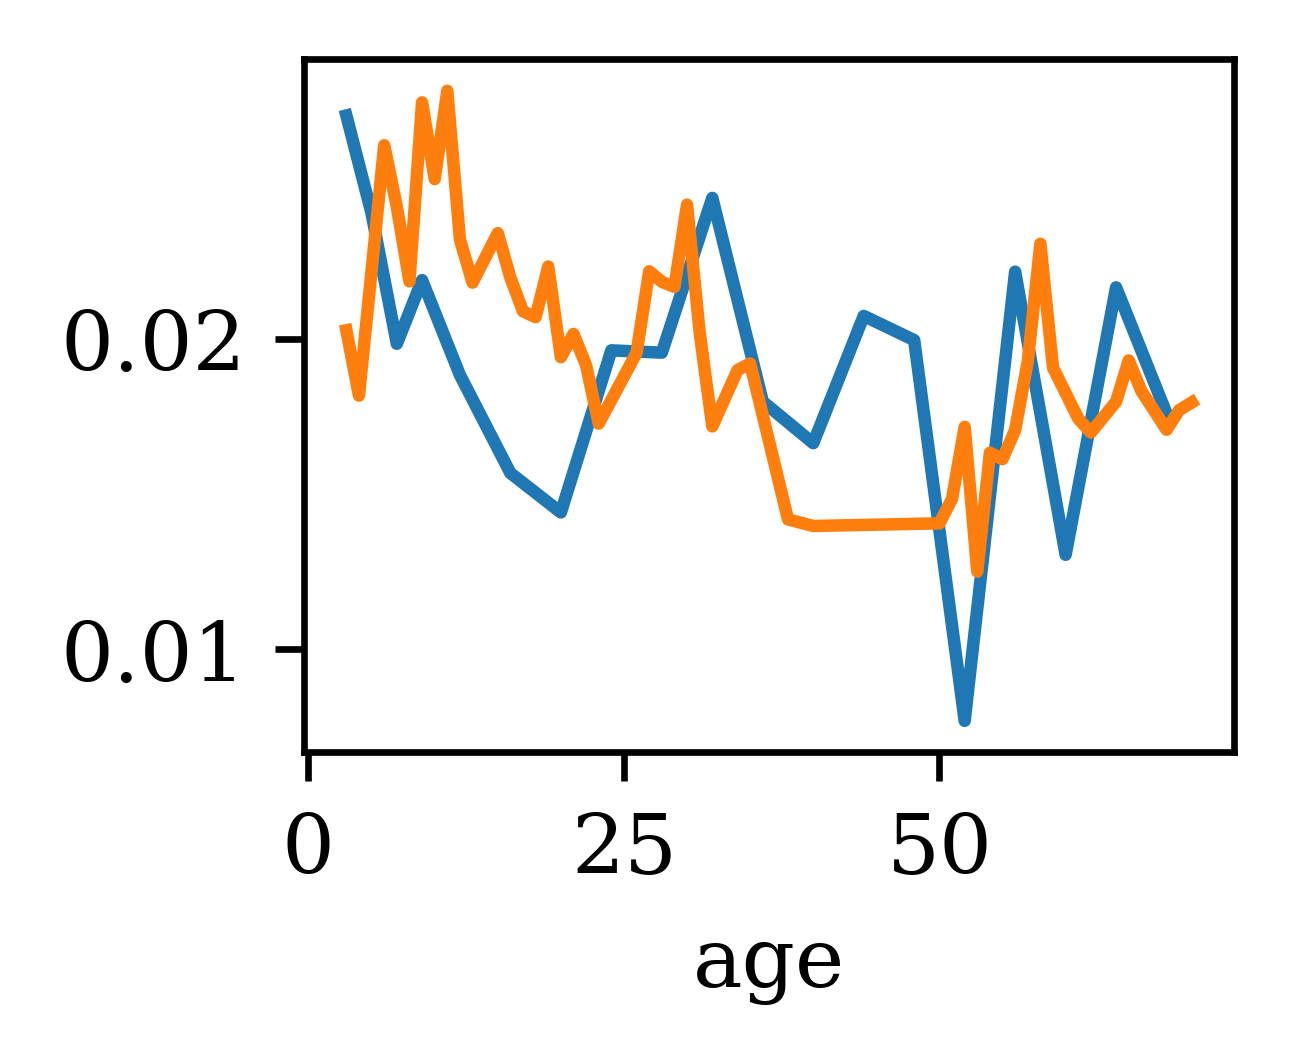

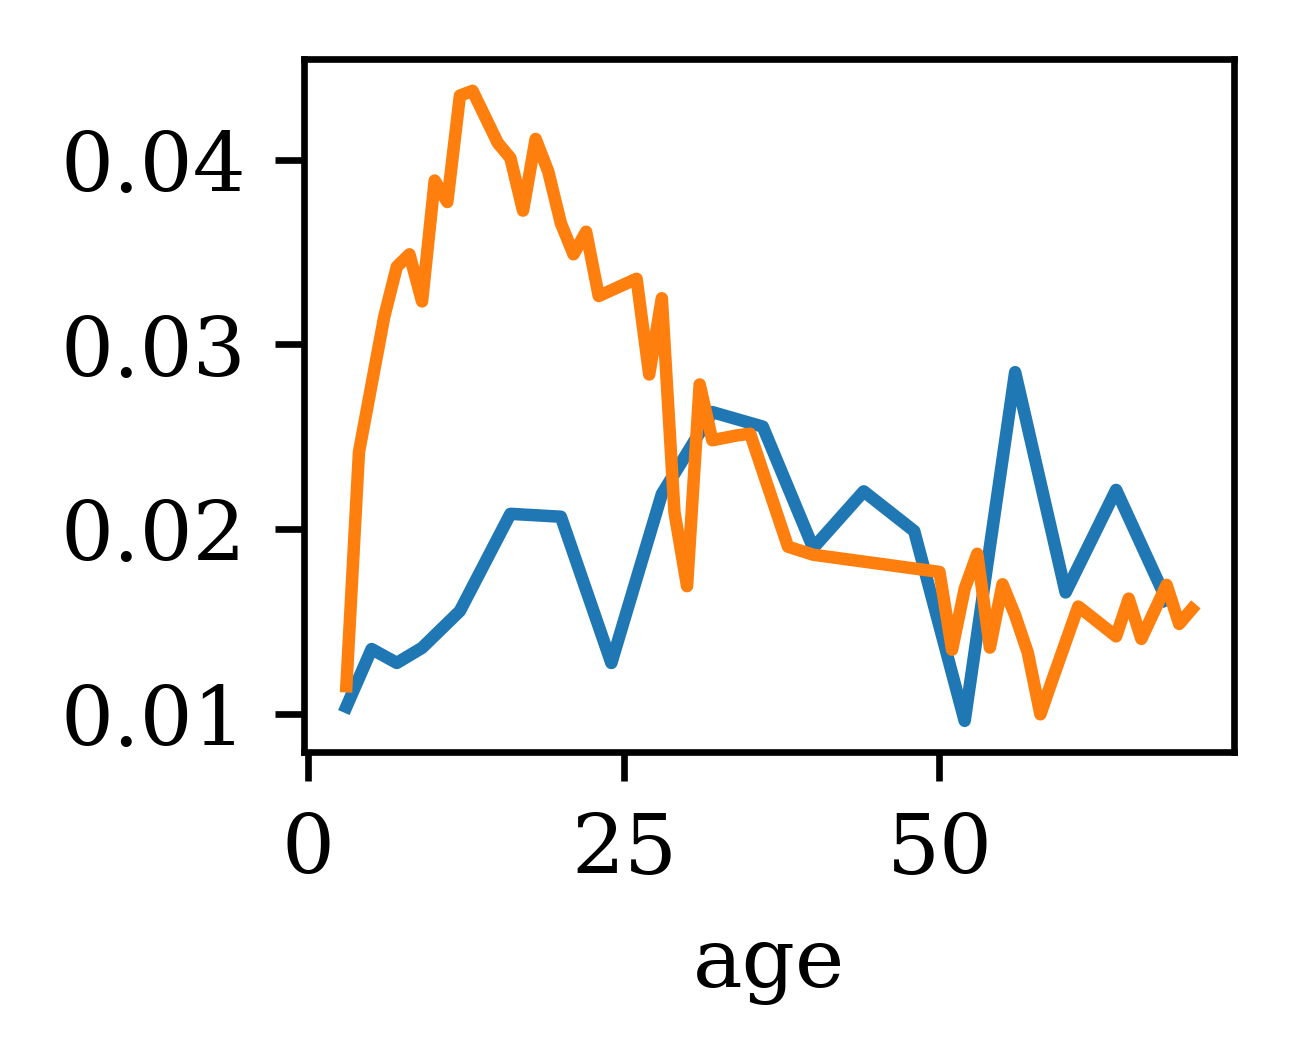

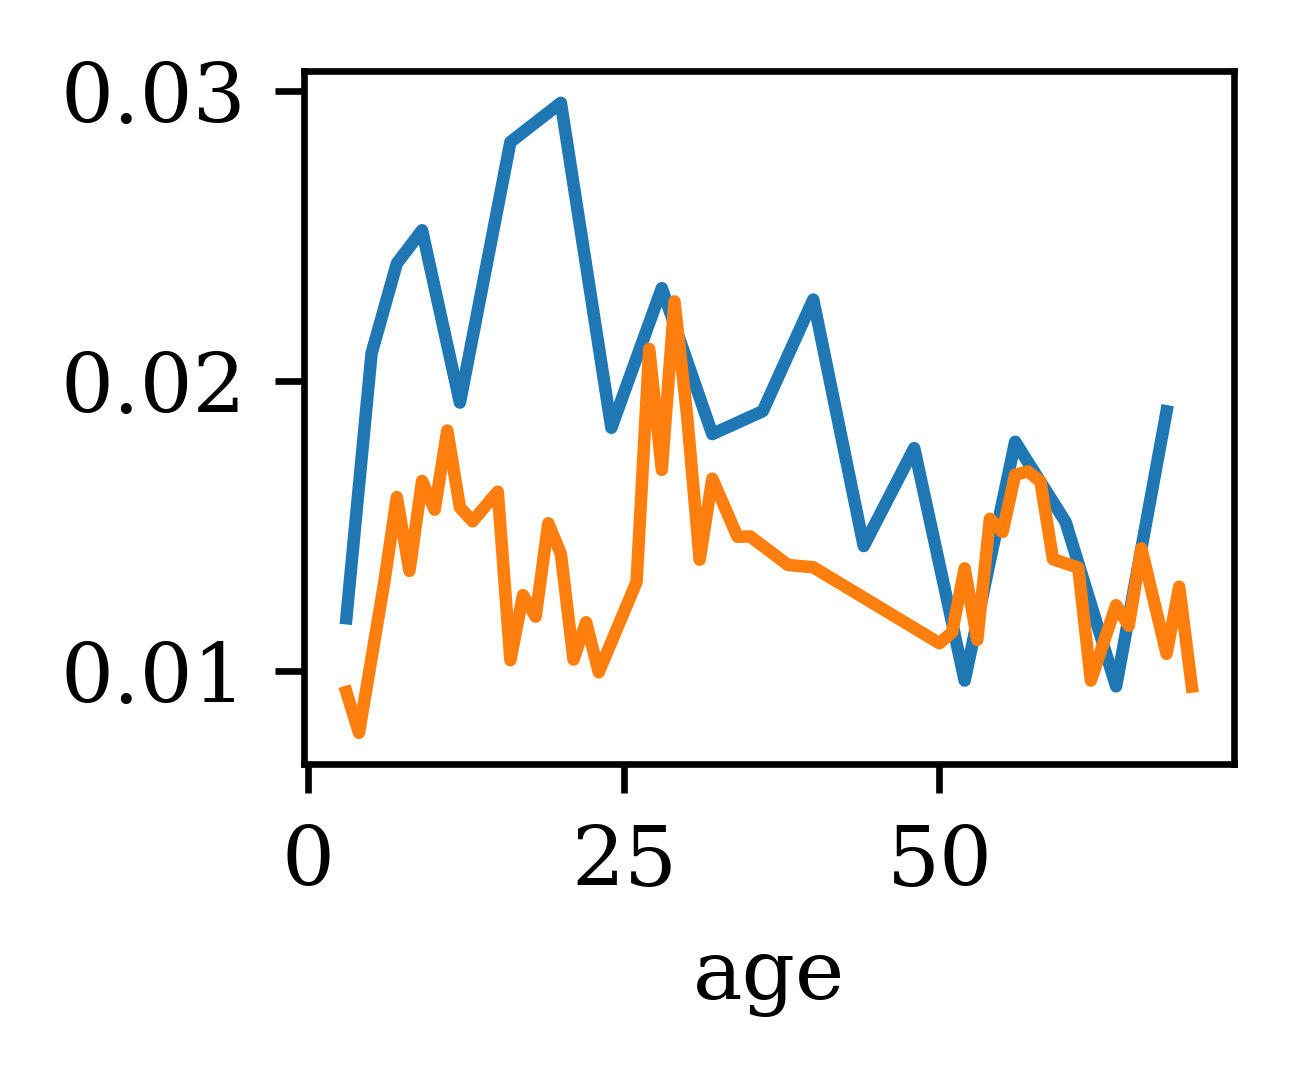

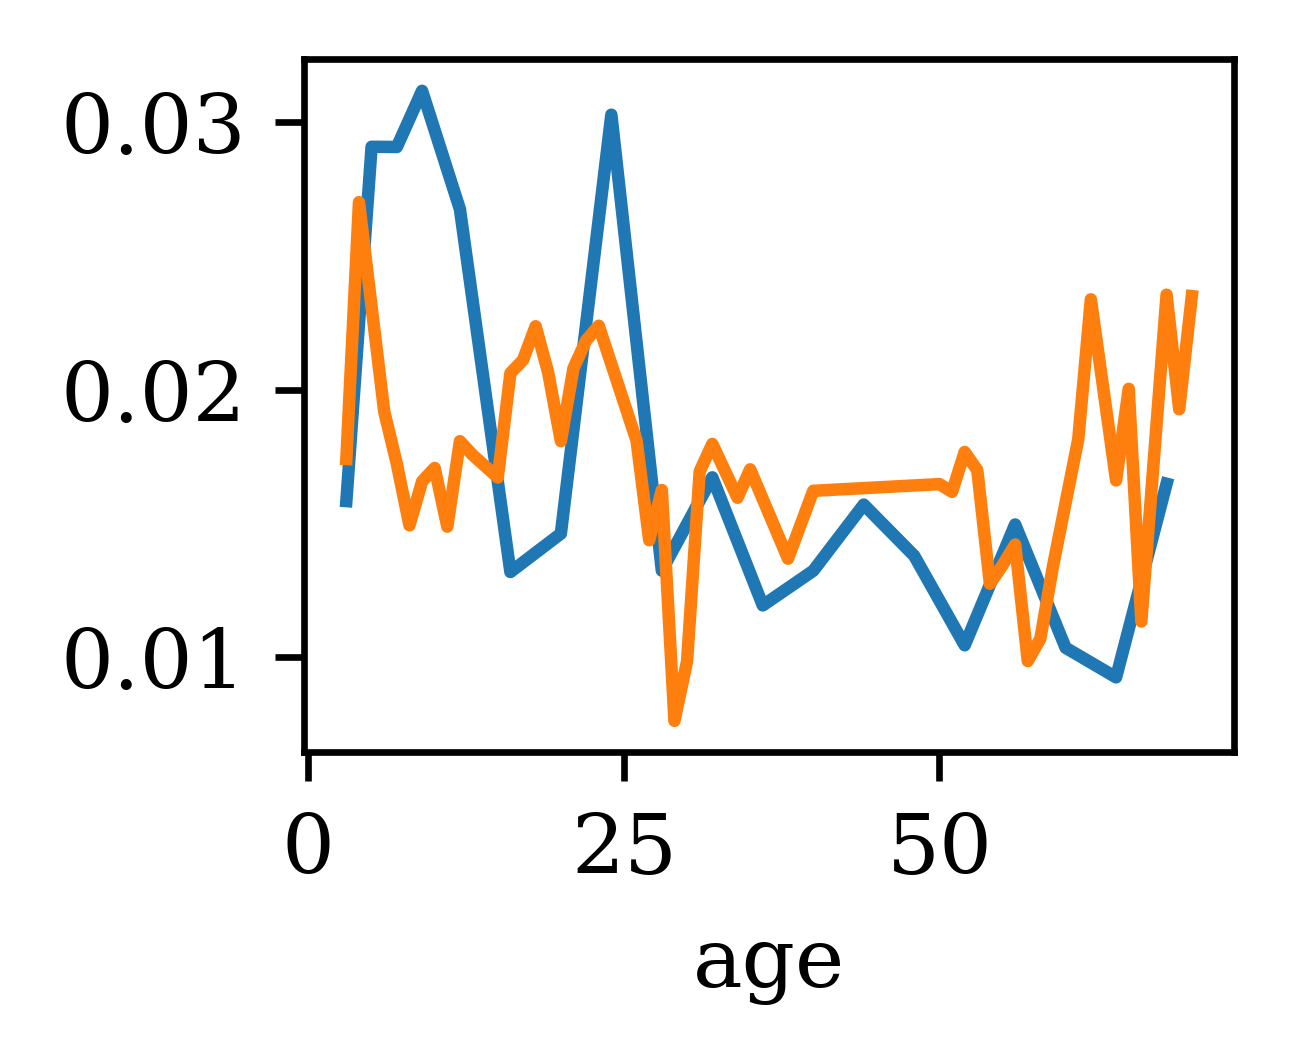

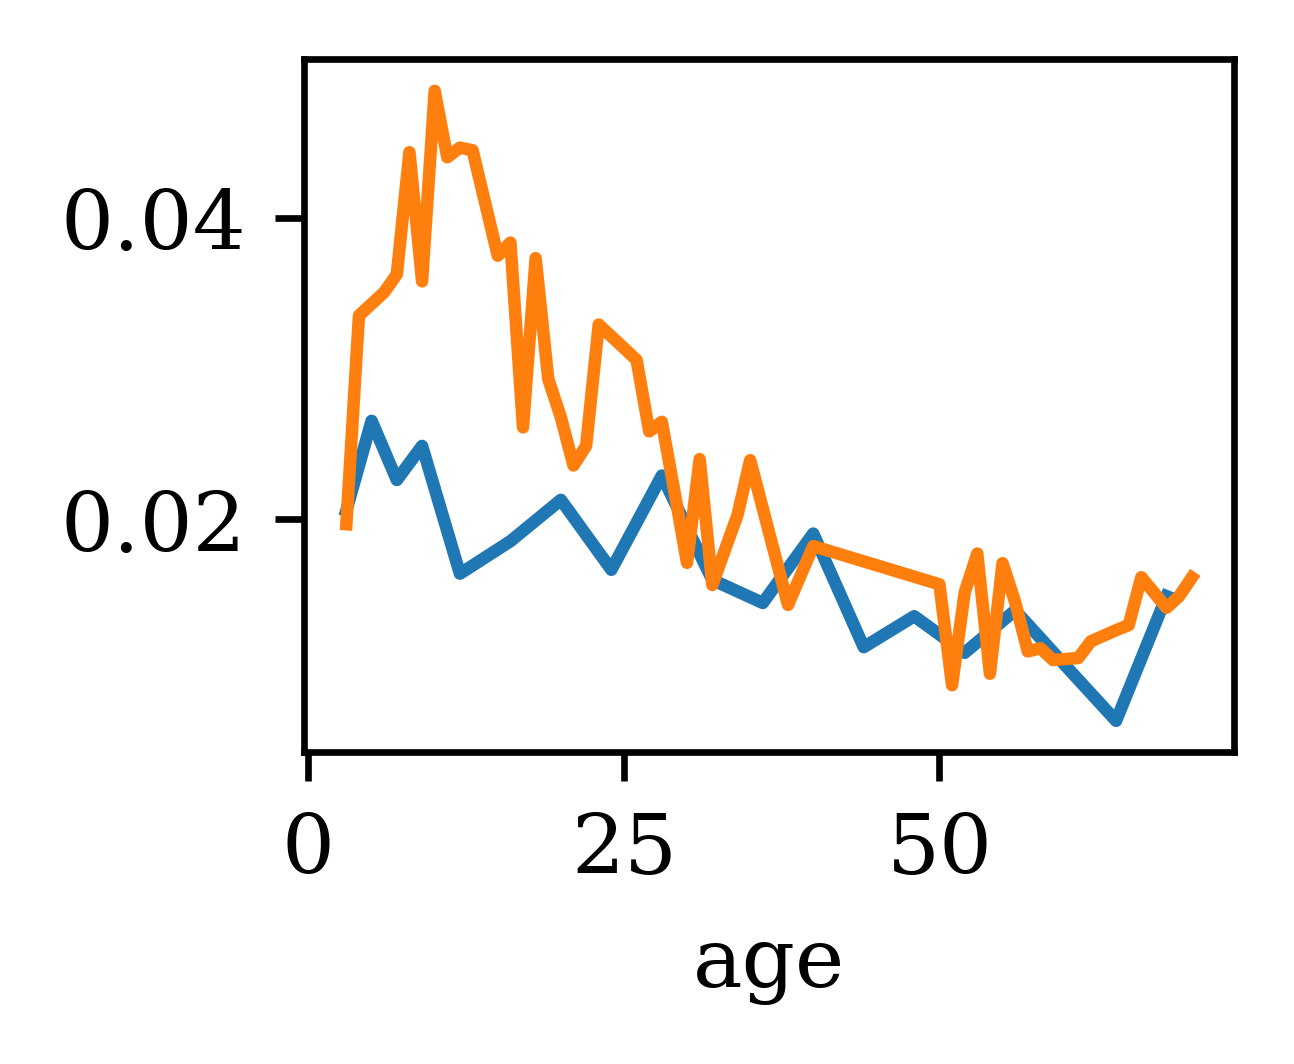

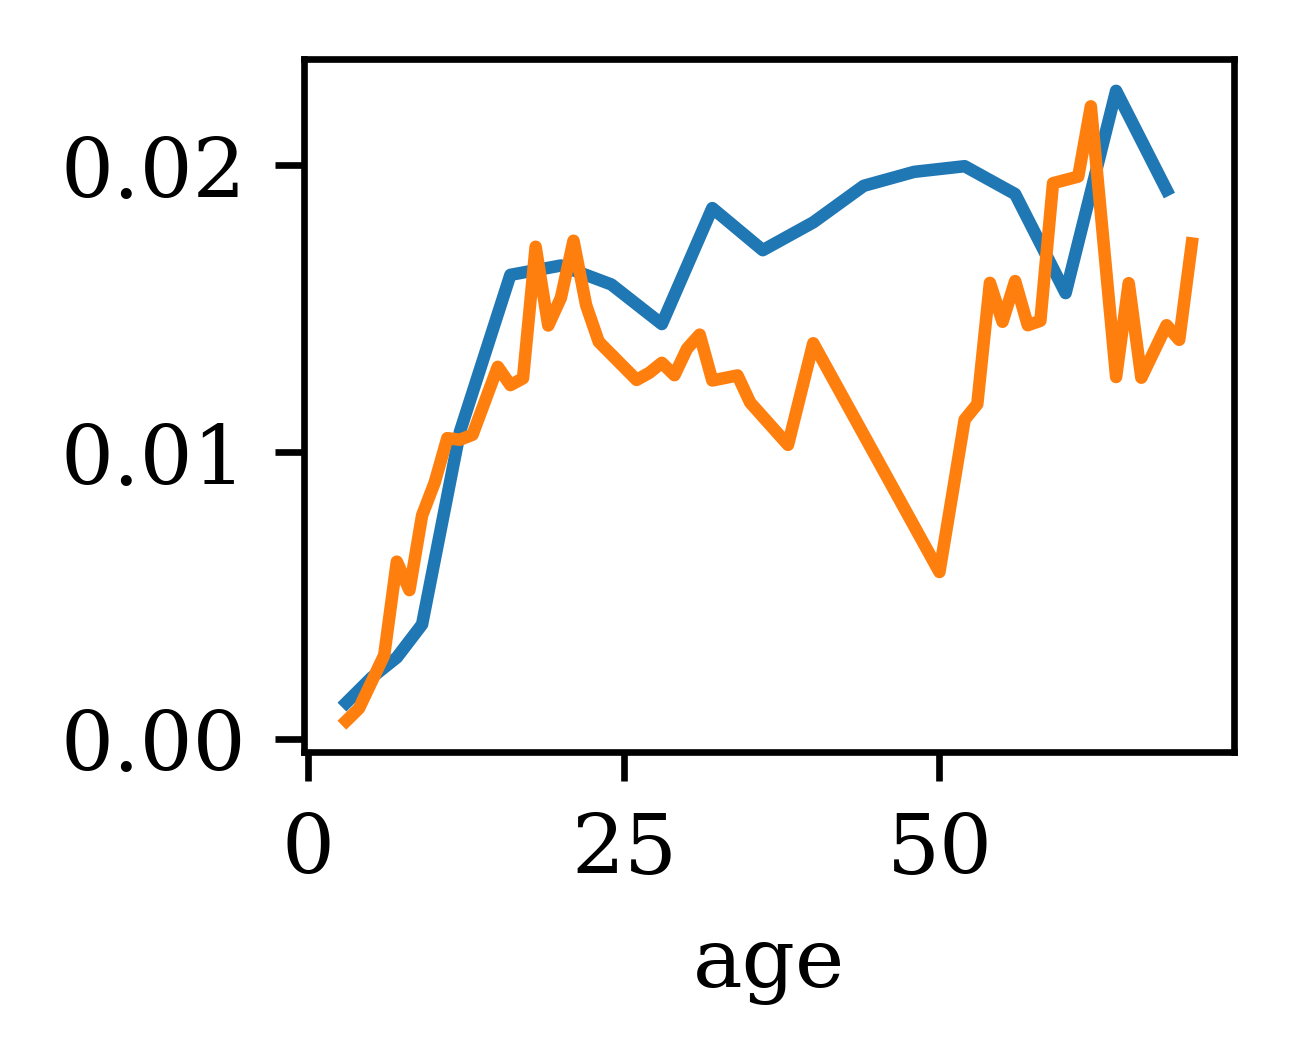

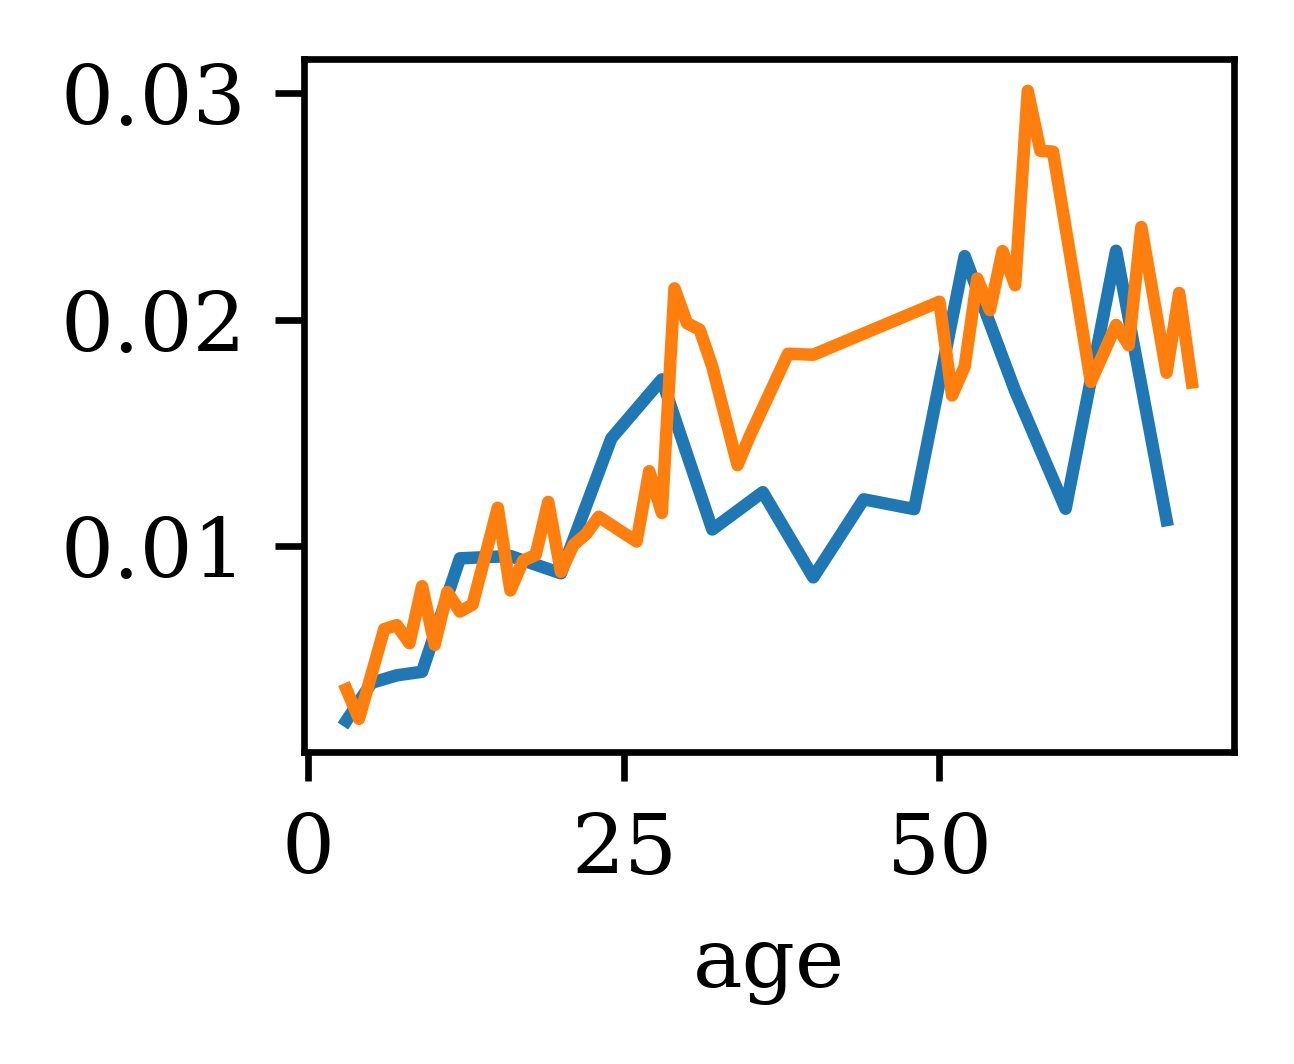

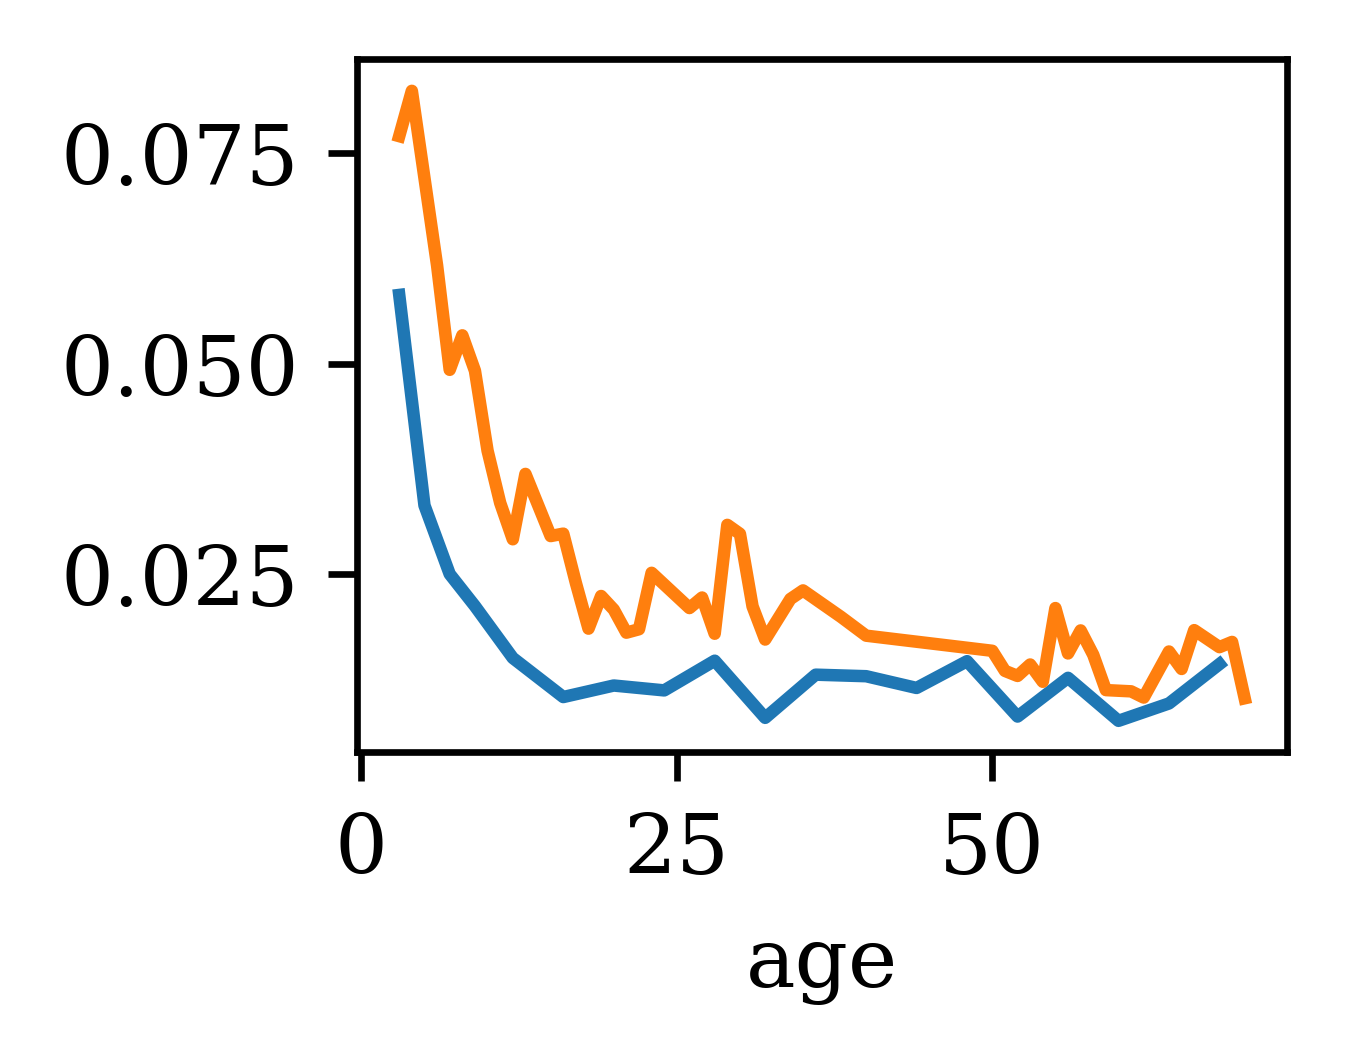

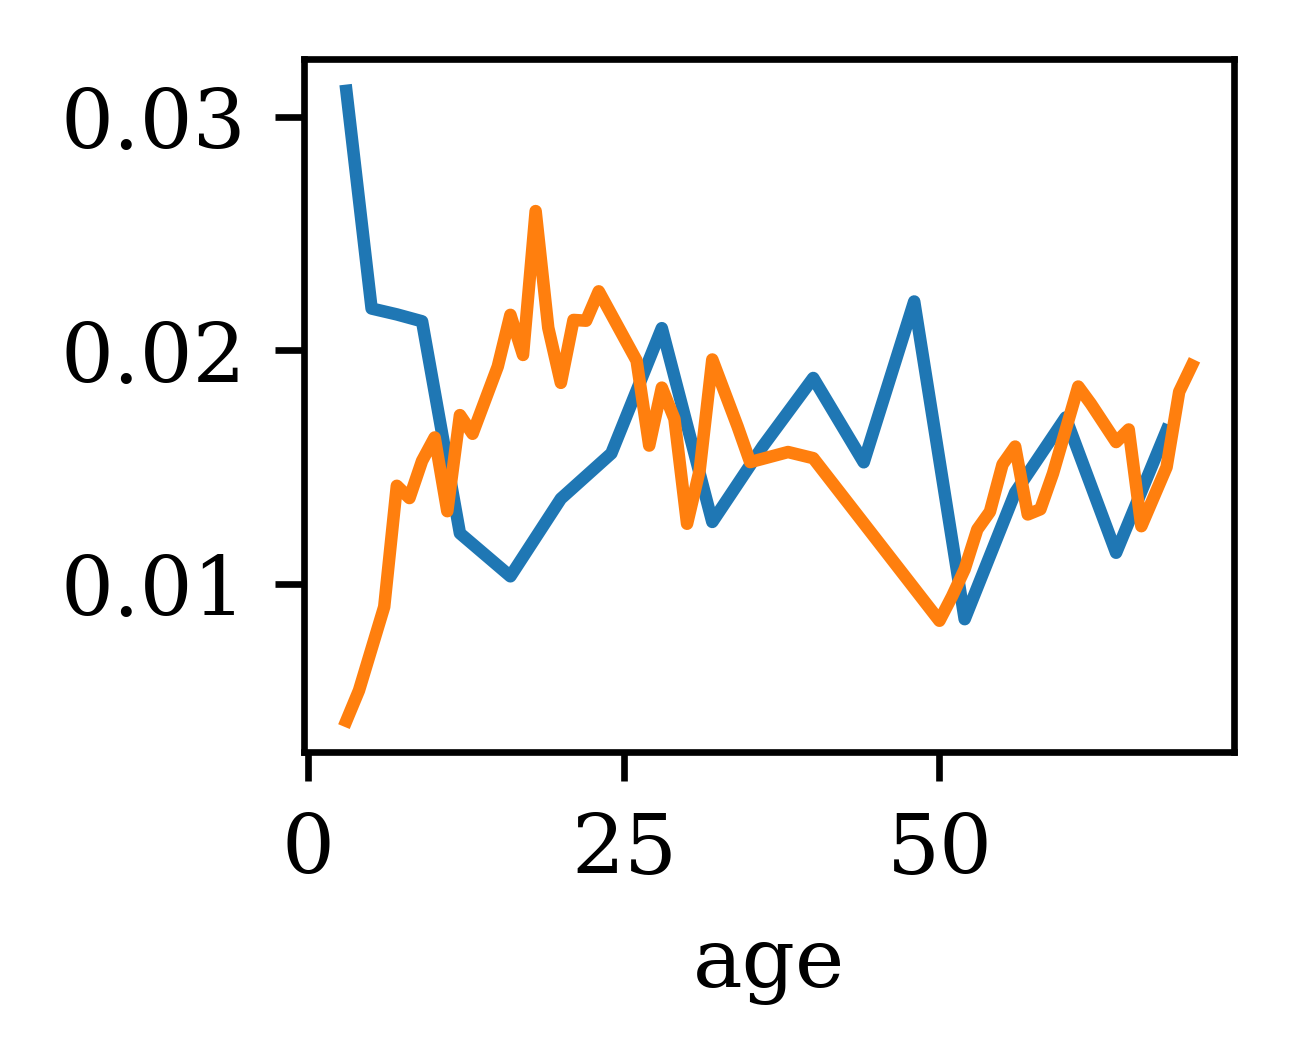

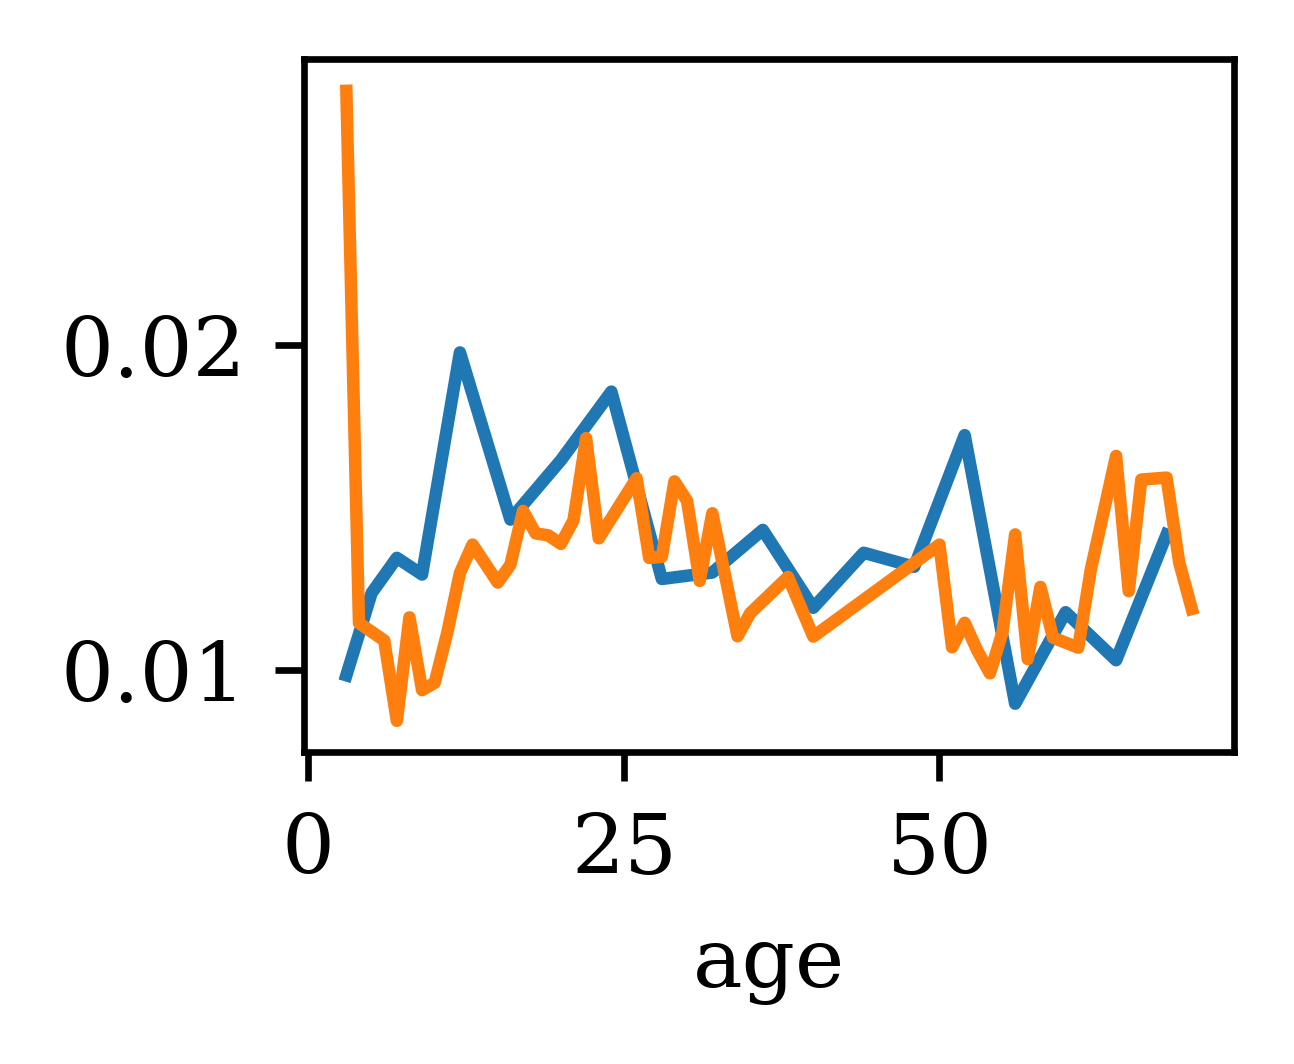

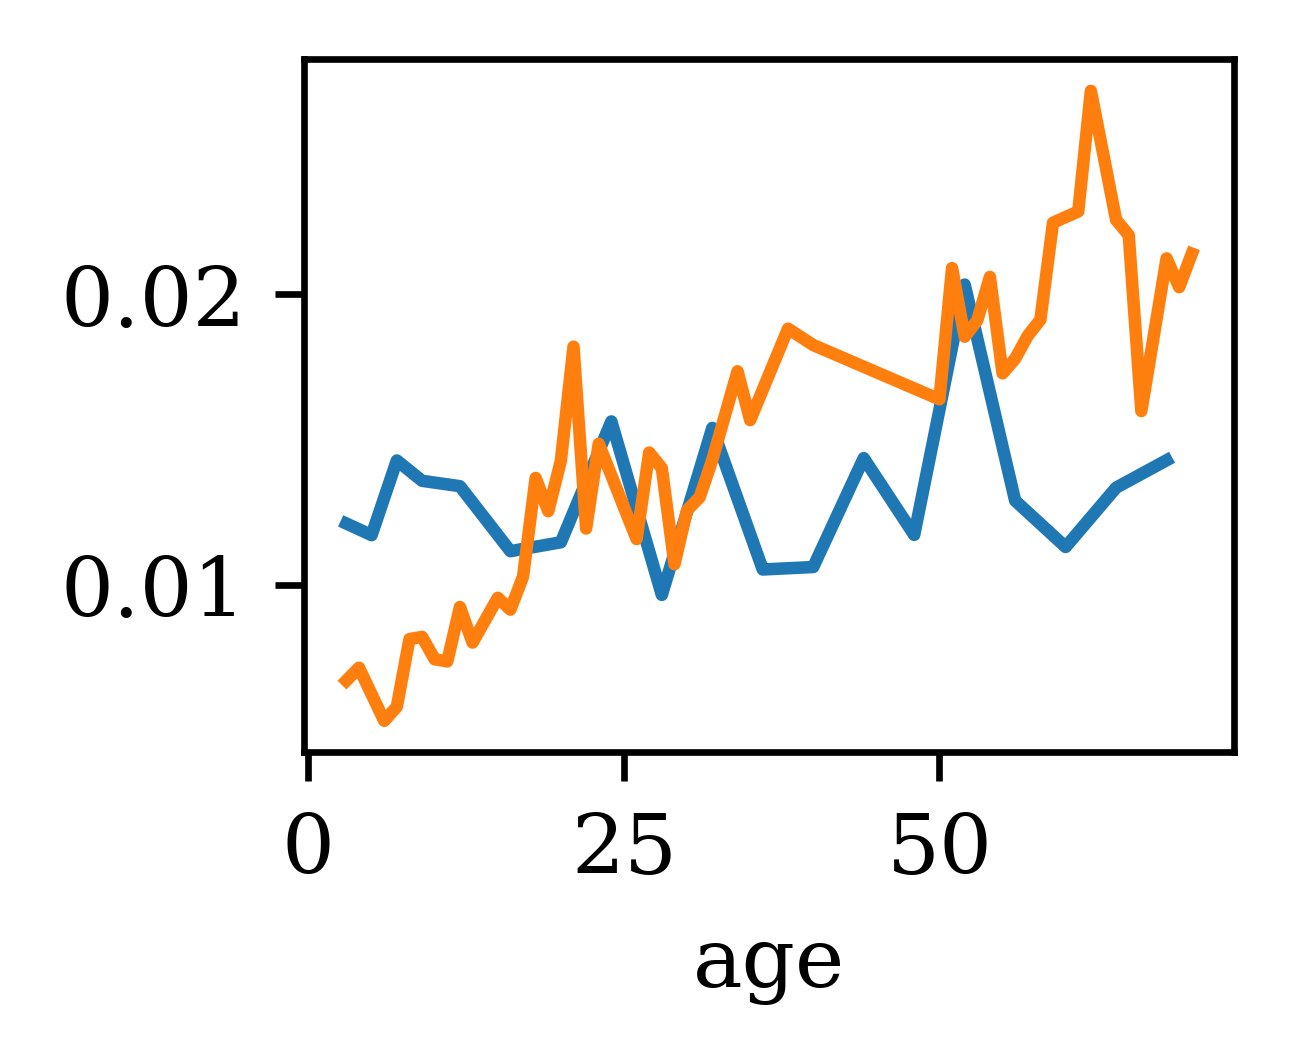

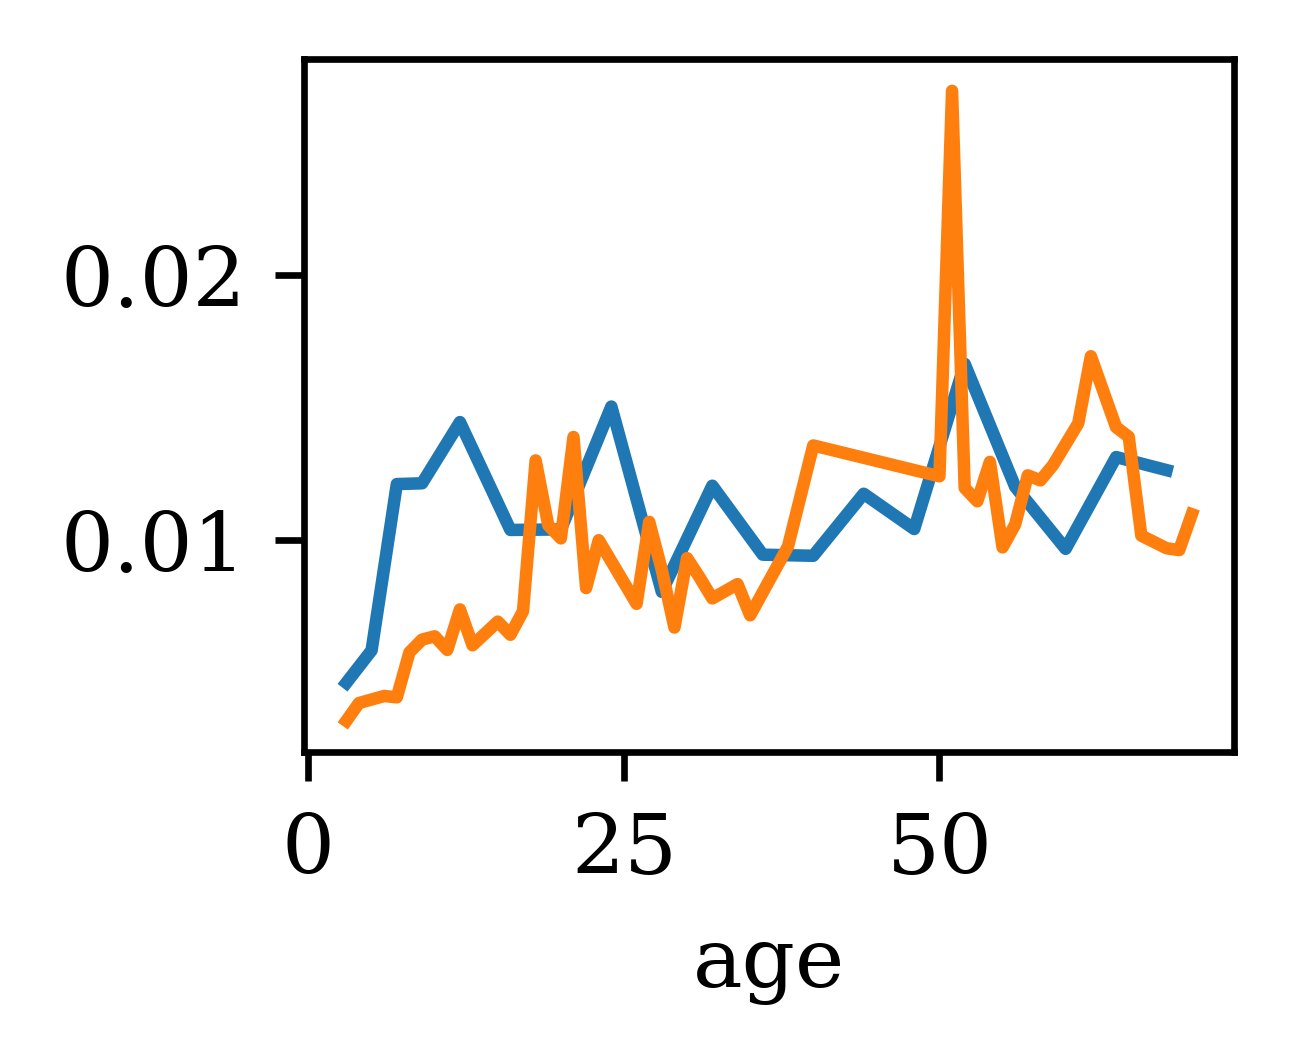

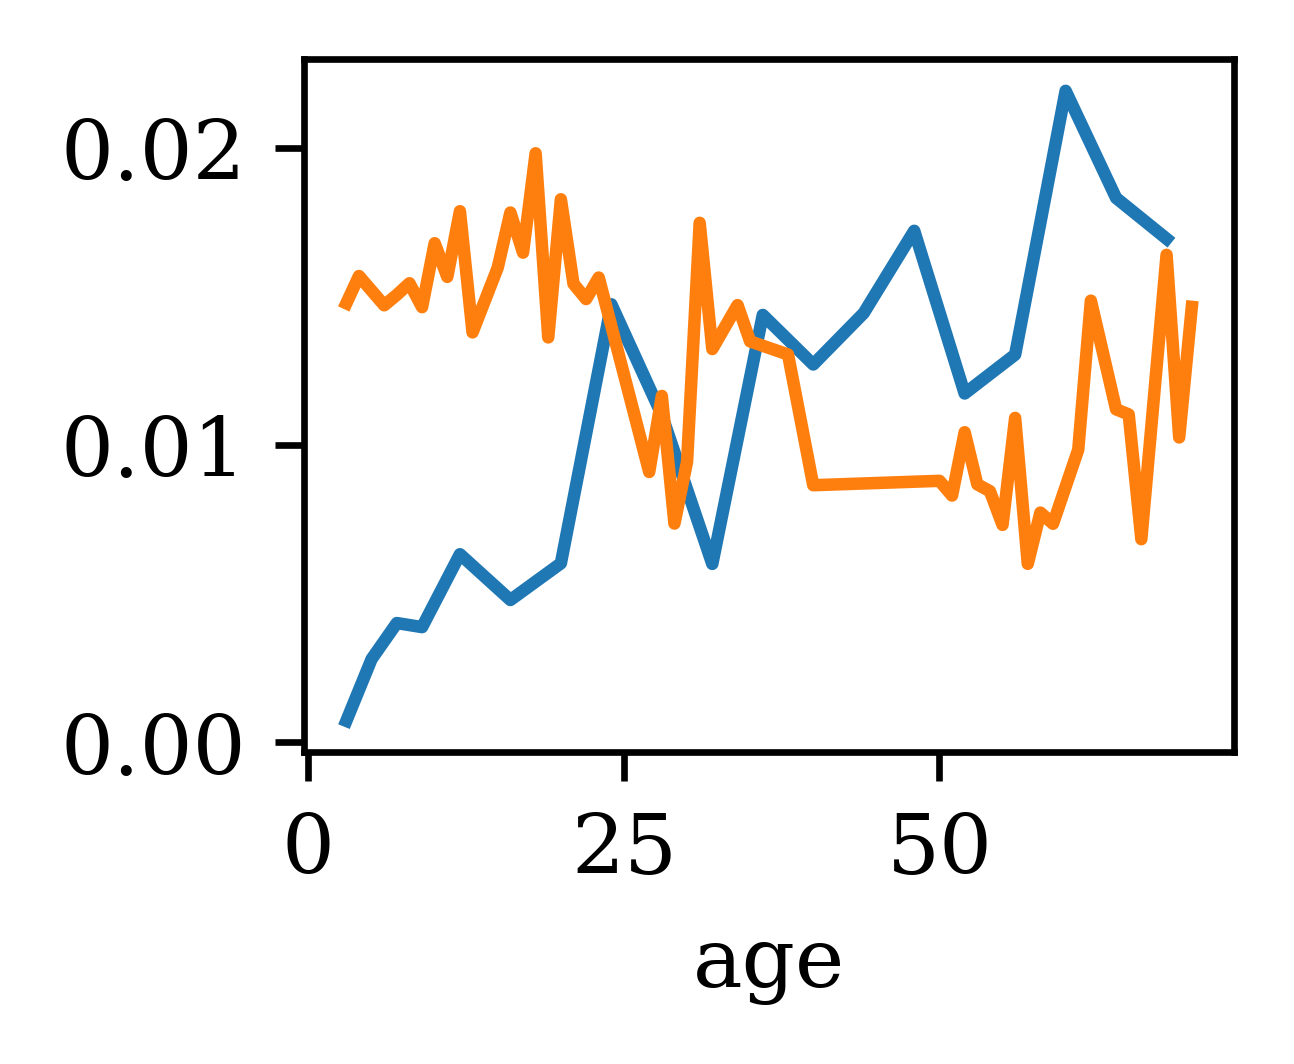

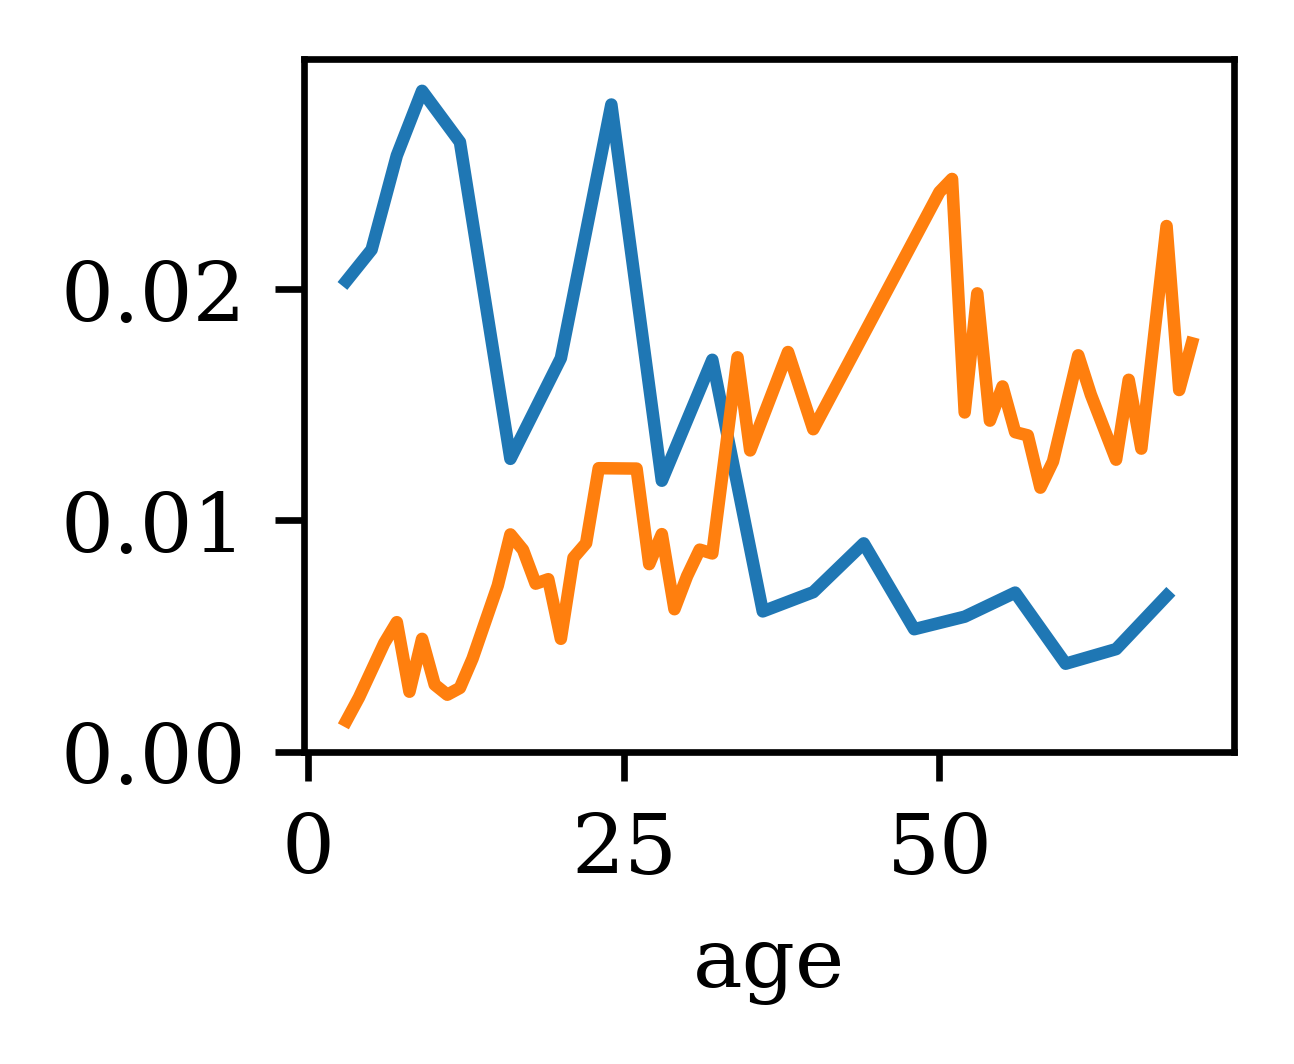

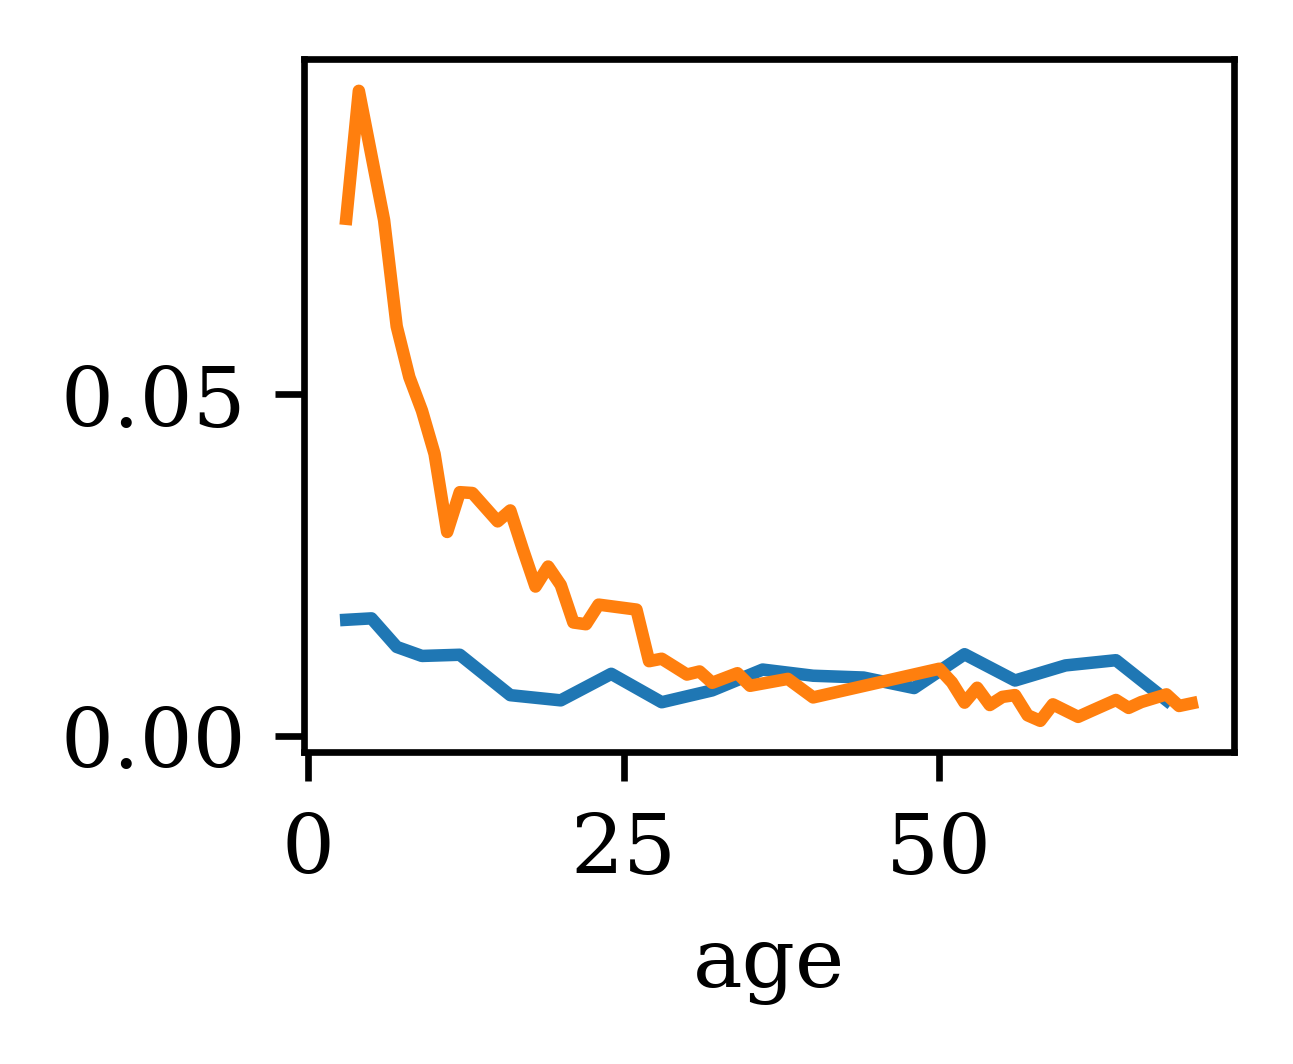

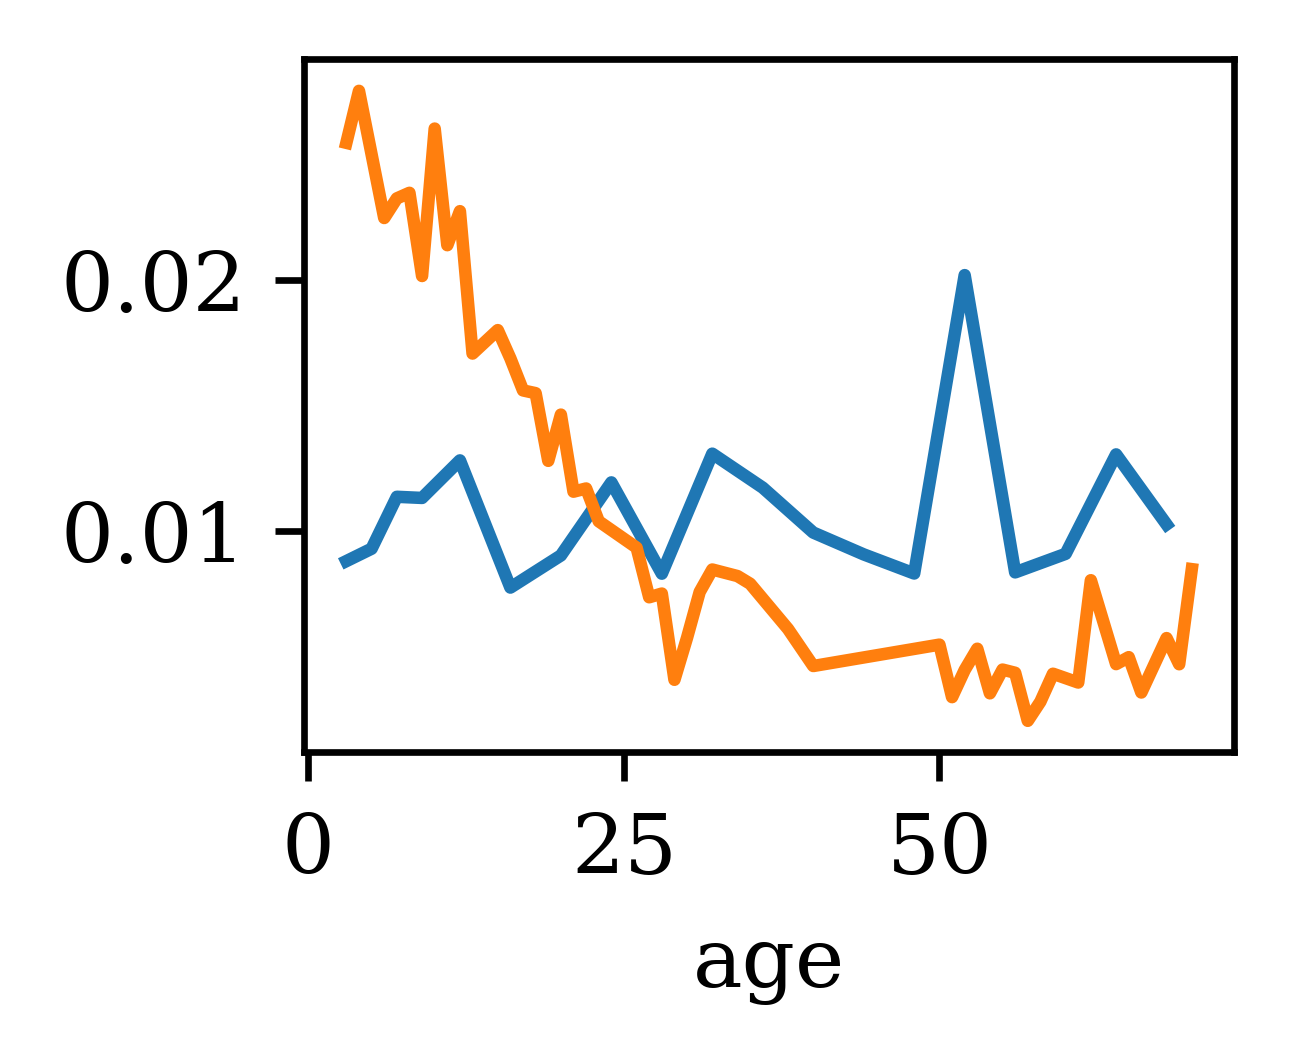

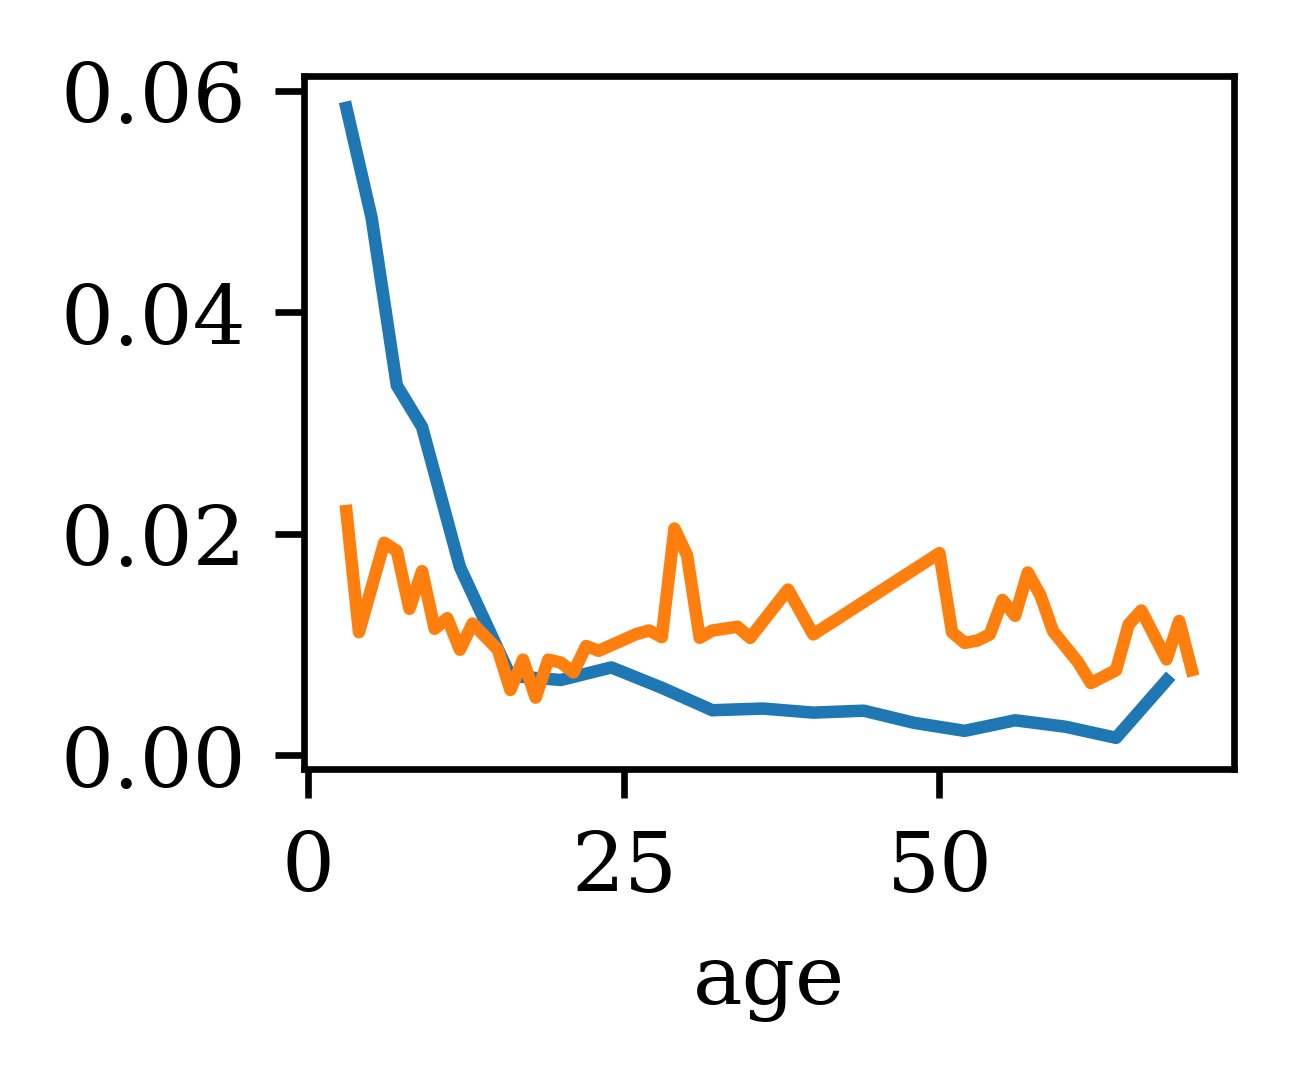

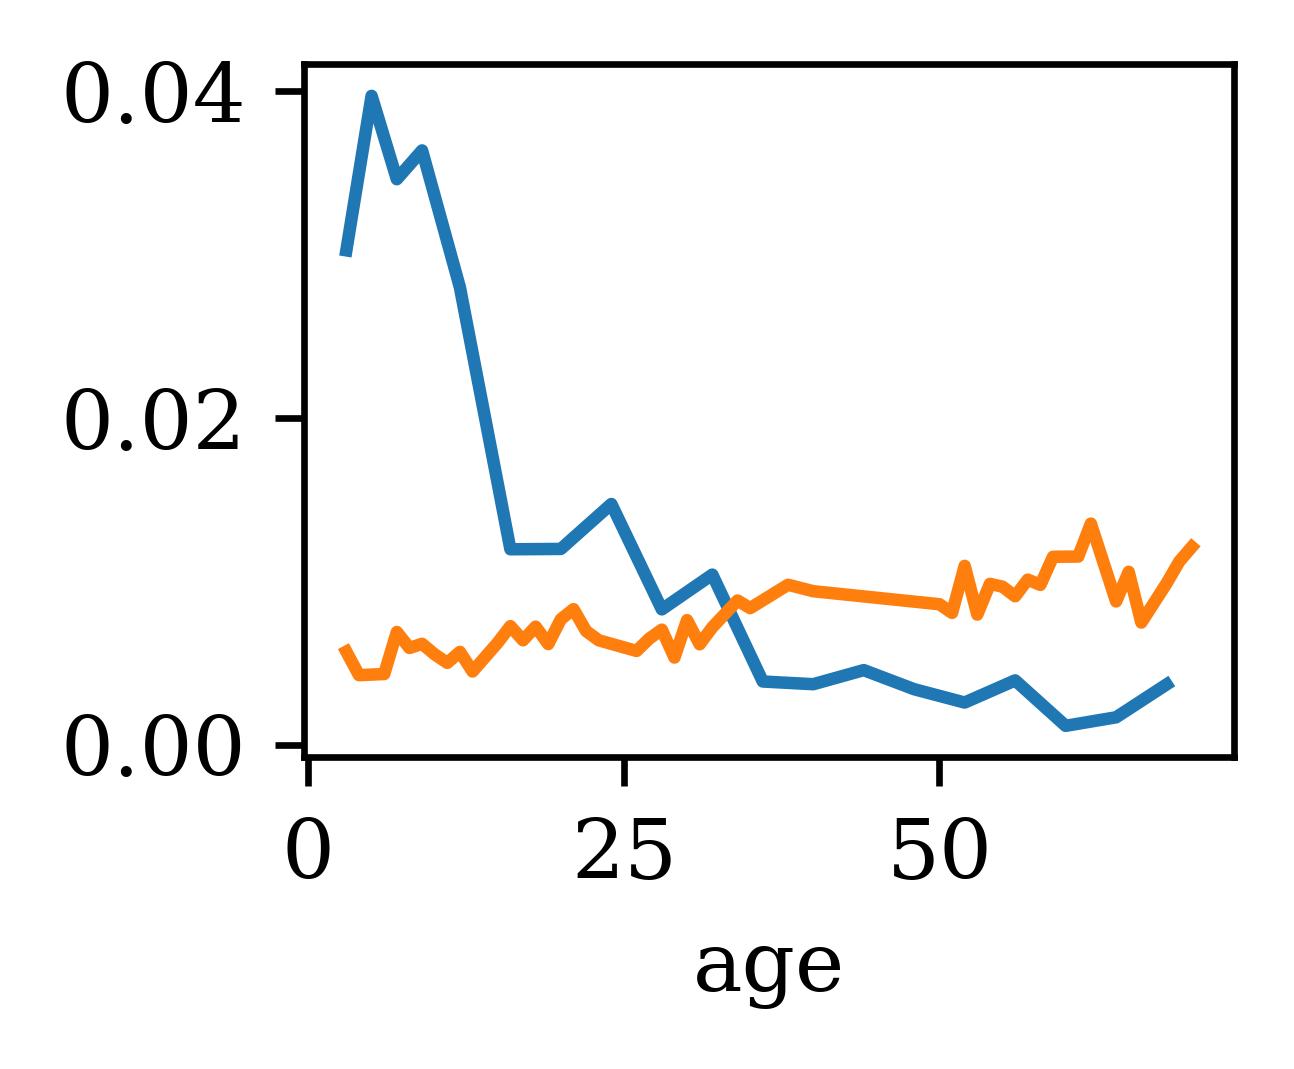

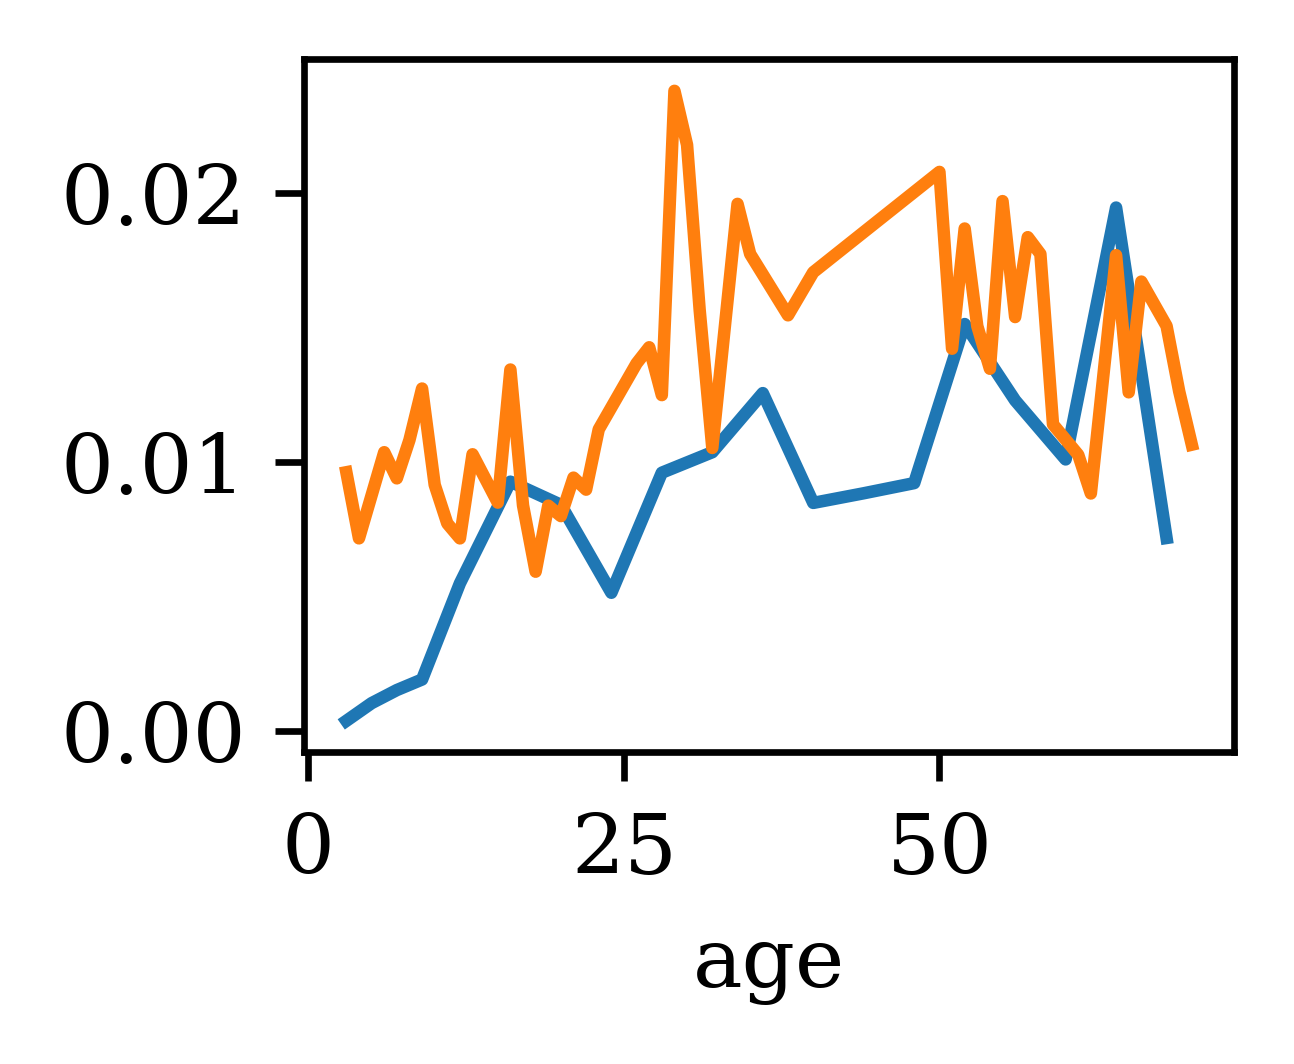

In [9]:
for i in range(40):
    plt.figure(figsize=(2, 1.5))
    age_dynamics[i].plot()
    long_age_dynamics[i].plot()

<Axes: xlabel='age'>

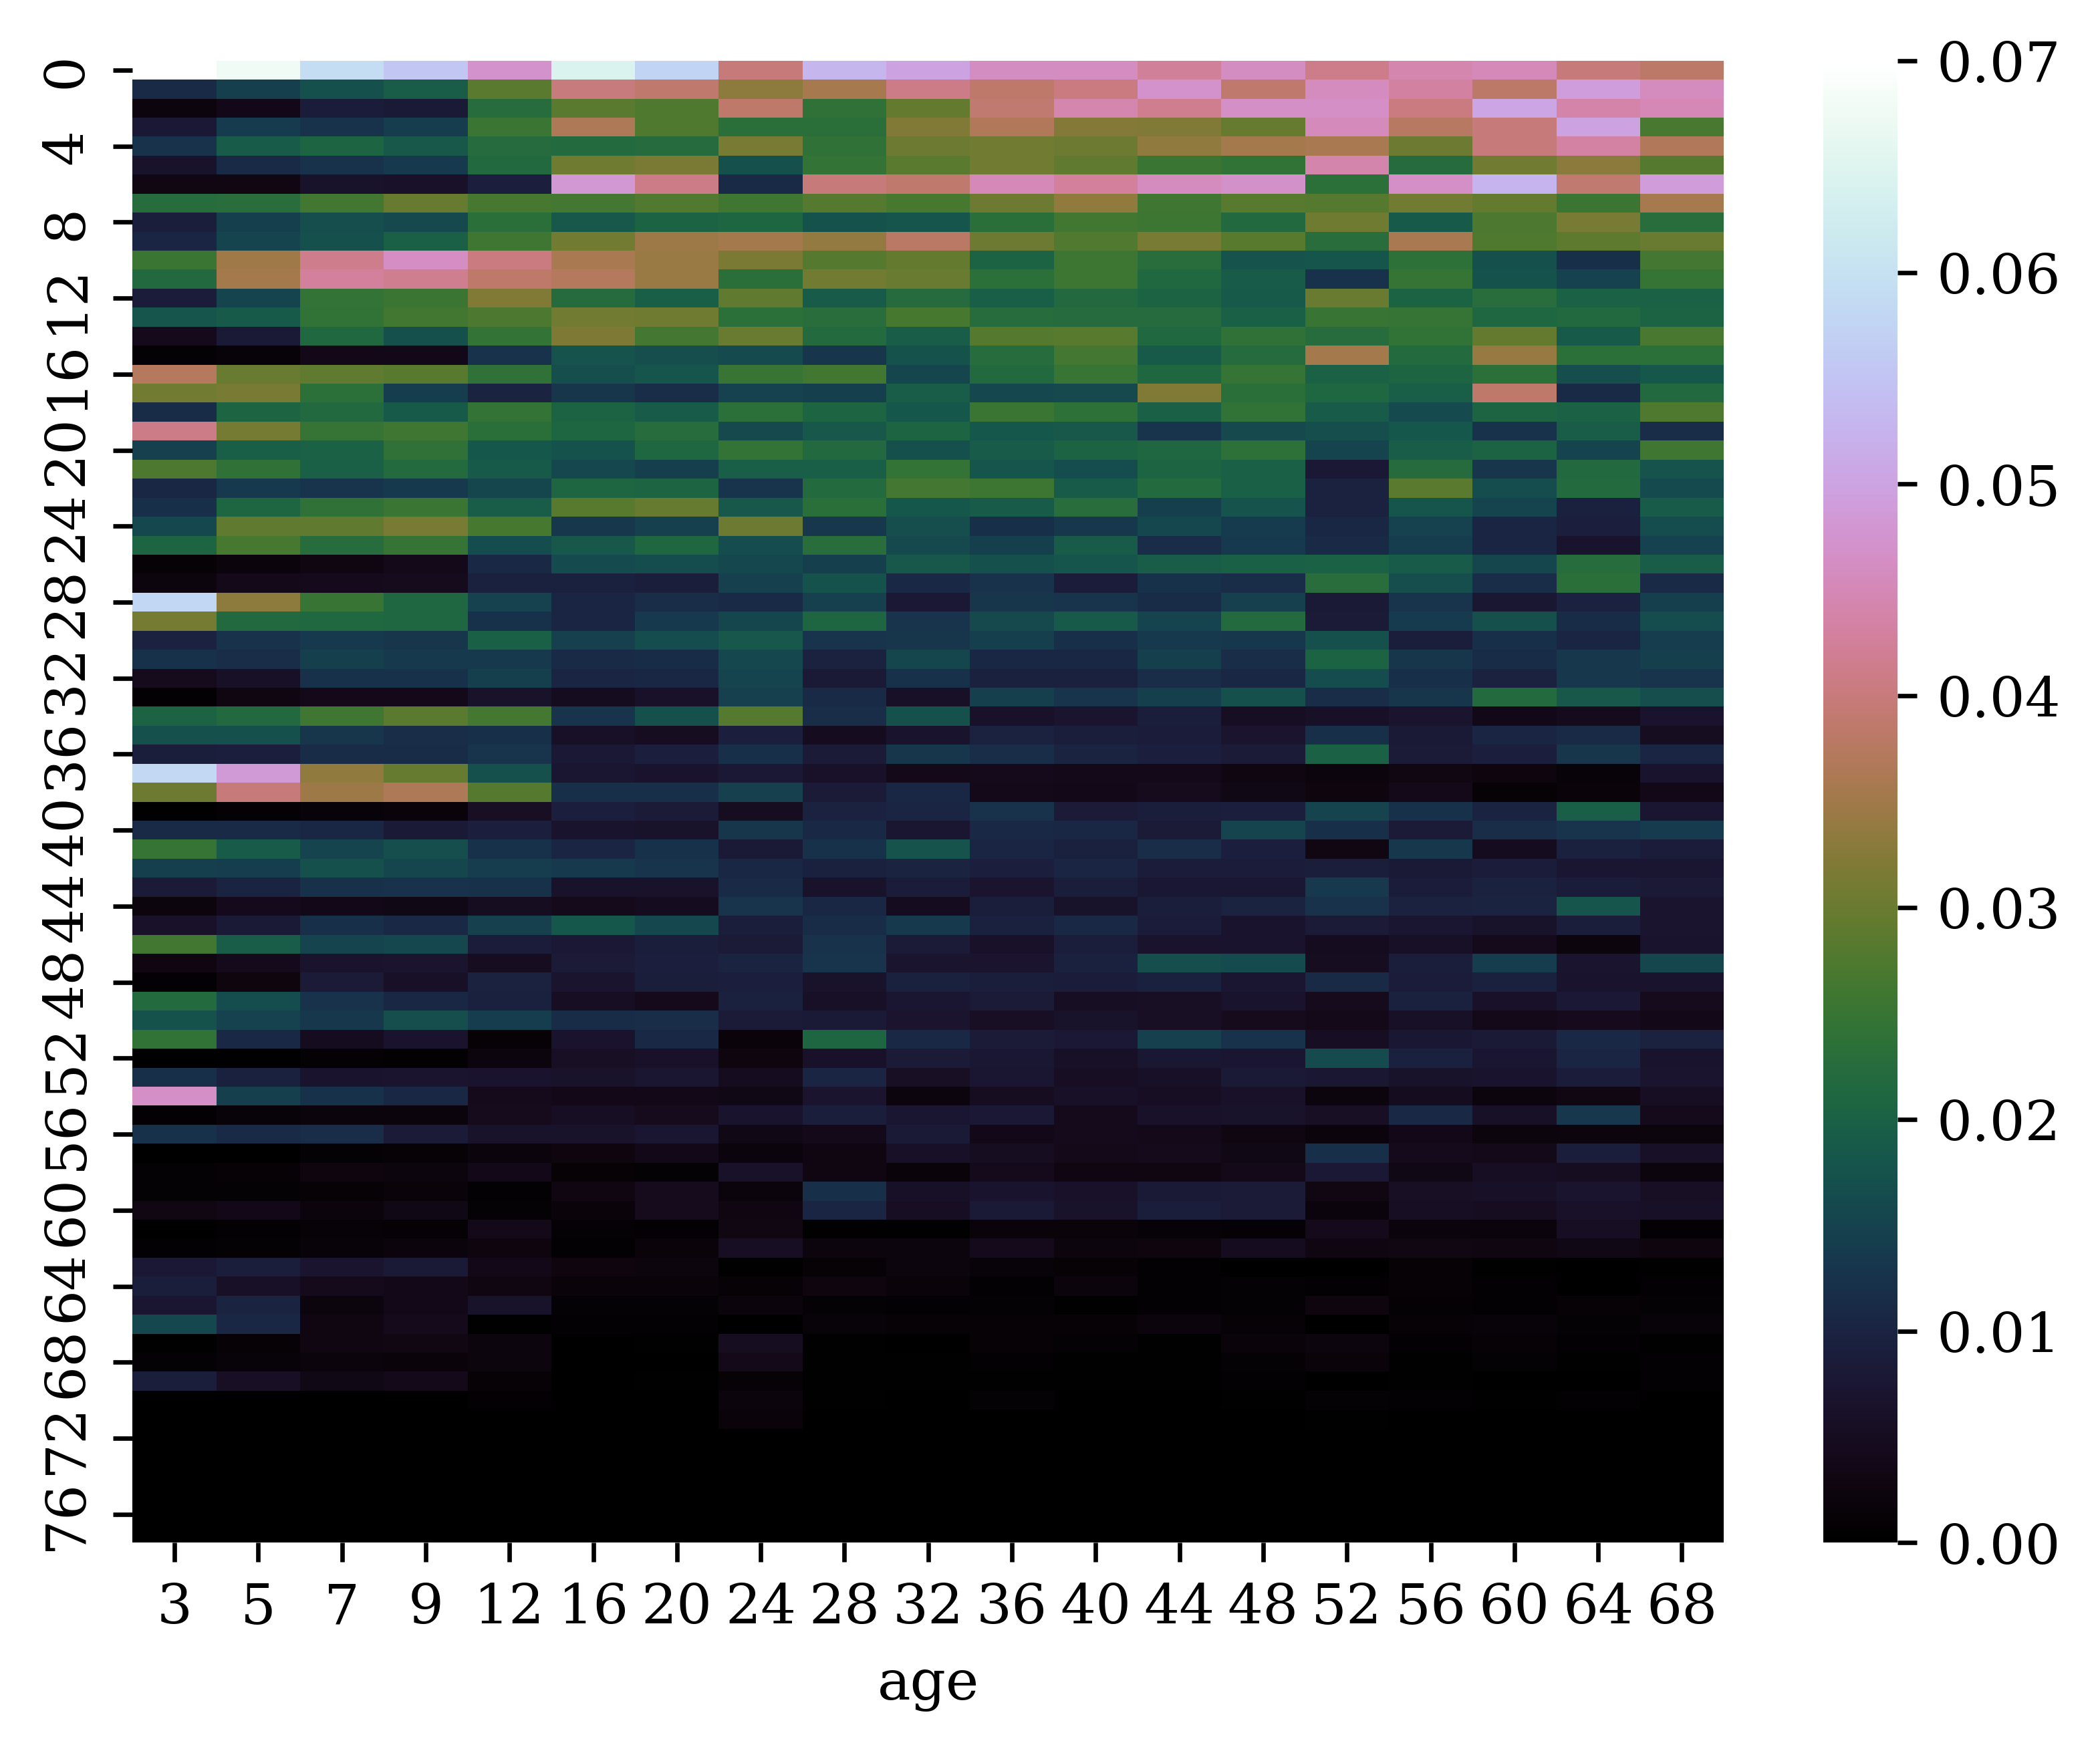

In [22]:
sns.heatmap(age_dynamics.T, cmap='cubehelix', vmax=0.07)

<Axes: xlabel='age'>

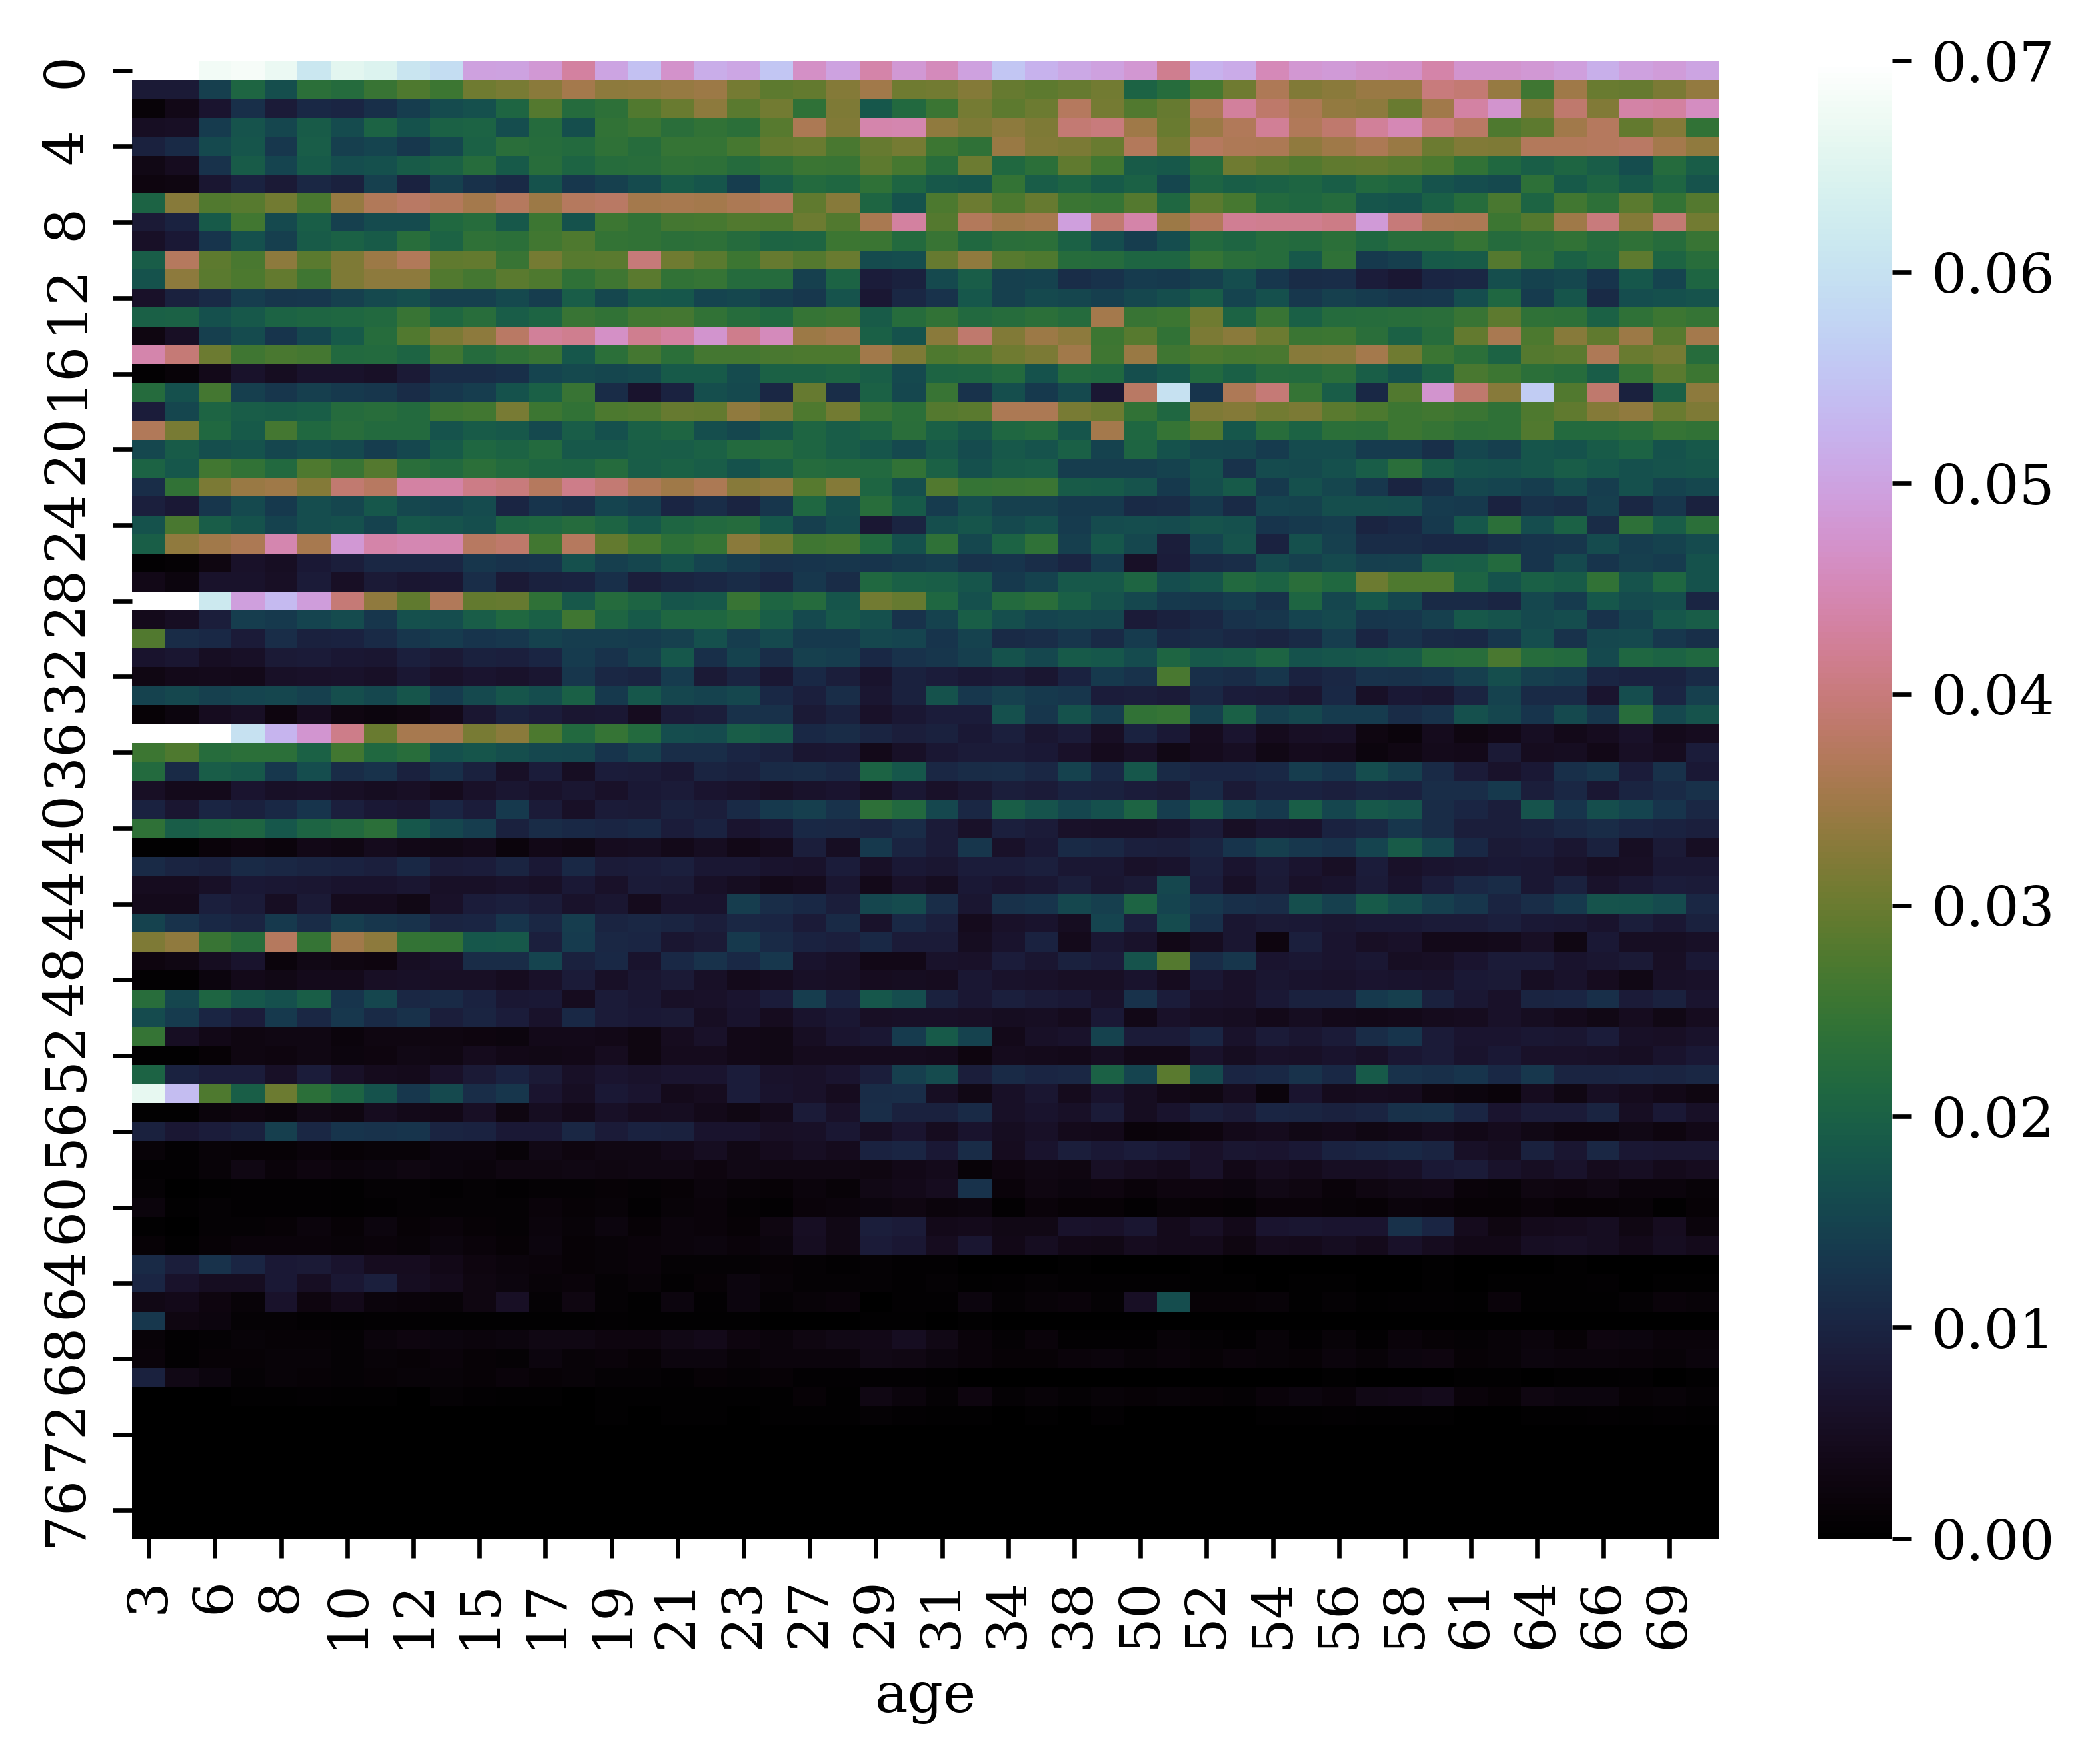

In [23]:
sns.heatmap(long_age_dynamics.T, cmap='cubehelix', vmax=0.07)